In [338]:
import numpy as np 
import pandas as pd
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
start_time = time.time()

In [339]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [340]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [341]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL       62.000     7917   Pave   NaN      Reg   
1456  1457          20       RL       85.000    13175   Pave   NaN      Reg   
1457  1458          70       RL       66.000     9042   Pave   NaN      Reg   
1458  1459          20       RL       68.000     9717   Pave   NaN      Reg   
1459  1460          20       RL       75.000     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [342]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [343]:
test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM       21.000     1936   Pave   NaN      Reg   
1455  2916         160       RM       21.000     1894   Pave   NaN      Reg   
1456  2917          20       RL      160.000    20000   Pave   NaN      Reg   
1457  2918          85       RL       62.000    10441   Pave   NaN      Reg   
1458  2919          60       RL       74.000     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[5 rows x 80 columns]

In [344]:
train.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1201.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.050  10516.828        6.099        5.575   
std    421.610      42.301       24.285   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    365.750      20.000       59.000   7553.500        5.000        5.000   
50%    730.500      50.000       69.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count   1460.000      1460.000    1452.000    1460.000  ...    1460.000   
mean    1971.268      1984.866     103.685     443.640  ...      94.245   
std       30.203        20.645     181.066     456.098  ...     125.339   
min     1872.000      1950.000       0.000       0.000  ...       0.000   
25%     1954.000      1967.000       0.000       0.000  ...       0.000   
50%     1973.000      1994.000       0.000     383.500  ...       0.000   
75%     2000.000      2004.000     166.000     712.250  ...     168.000   
max     2010.000      2010.000    1600.000    5644.000  ...     857.000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count     1460.000       1460.000   1460.000     1460.000  1460.000  1460.000   
mean        46.660         21.954      3.410       15.061     2.759    43.489   
std         66.256         61.119     29.317       55.757    40.177   496.123   
min          0.000          0.000      0.000        0.000     0.000     0.000   
25%          0.000          0.000      0.000        0.000     0.000     0.000   
50%         25.000          0.000      0.000        0.000     0.000     0.000   
75%         68.000          0.000      0.000        0.000     0.000     0.000   
max        547.000        552.000    508.000      480.000   738.000 15500.000   

        MoSold   YrSold  SalePrice  
count 1460.000 1460.000   1460.000  
mean     6.322 2007.816 180921.196  
std      2.704    1.328  79442.503  
min      1.000 2006.000  34900.000  
25%      5.000 2007.000 129975.000  
50%      6.000 2008.000 163000.000  
75%      8.000 2009.000 214000.000  
max     12.000 2010.000 755000.000  

[8 rows x 38 columns]

In [345]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


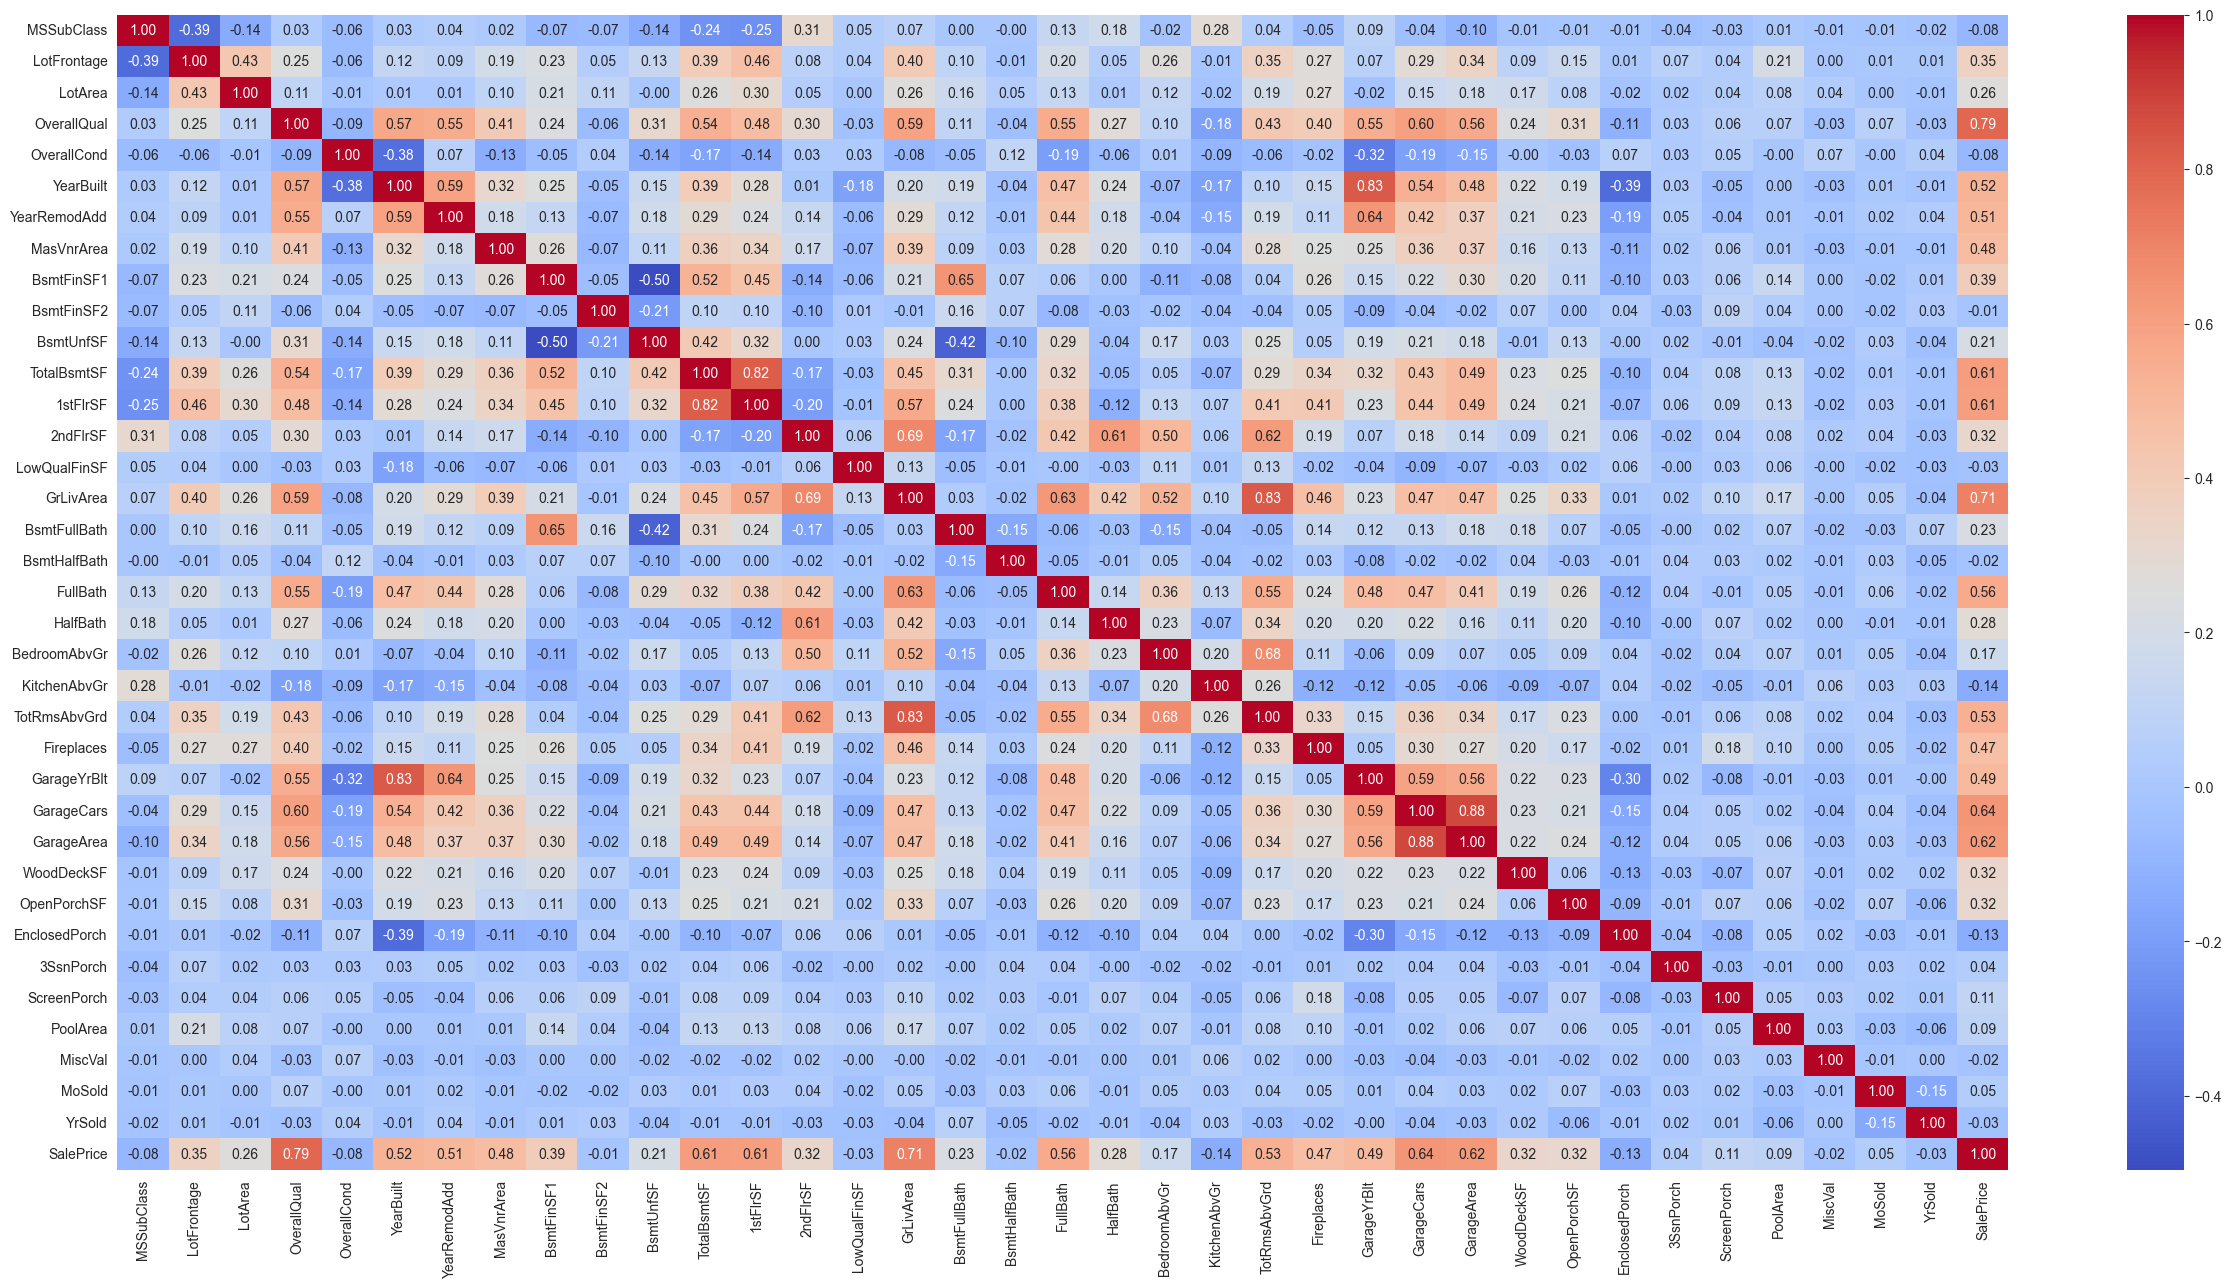

In [346]:
#绘制相关矩阵
numeric_data = train.select_dtypes(include=[float, int])
corrmat = numeric_data.corr()
plt.figure(figsize=(30.5, 15))  
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

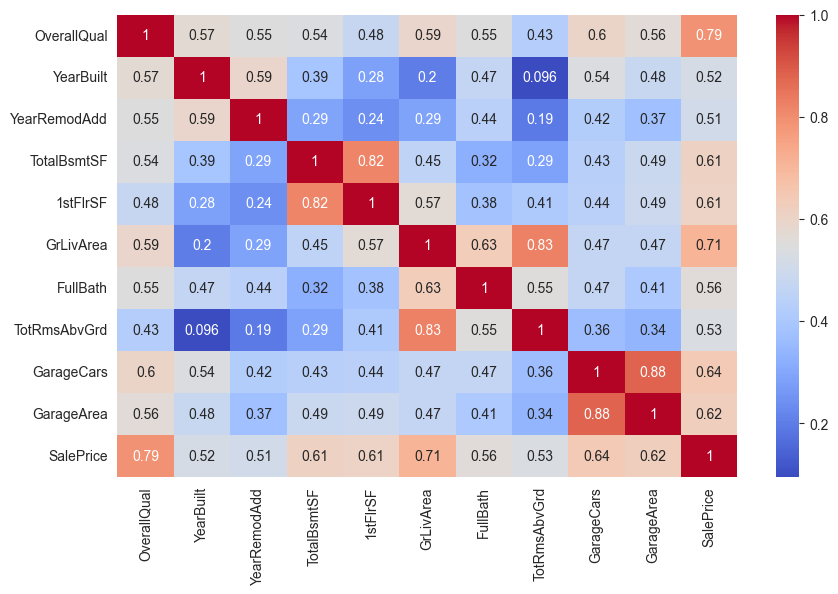

In [347]:
corrmat = numeric_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,6))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="coolwarm")

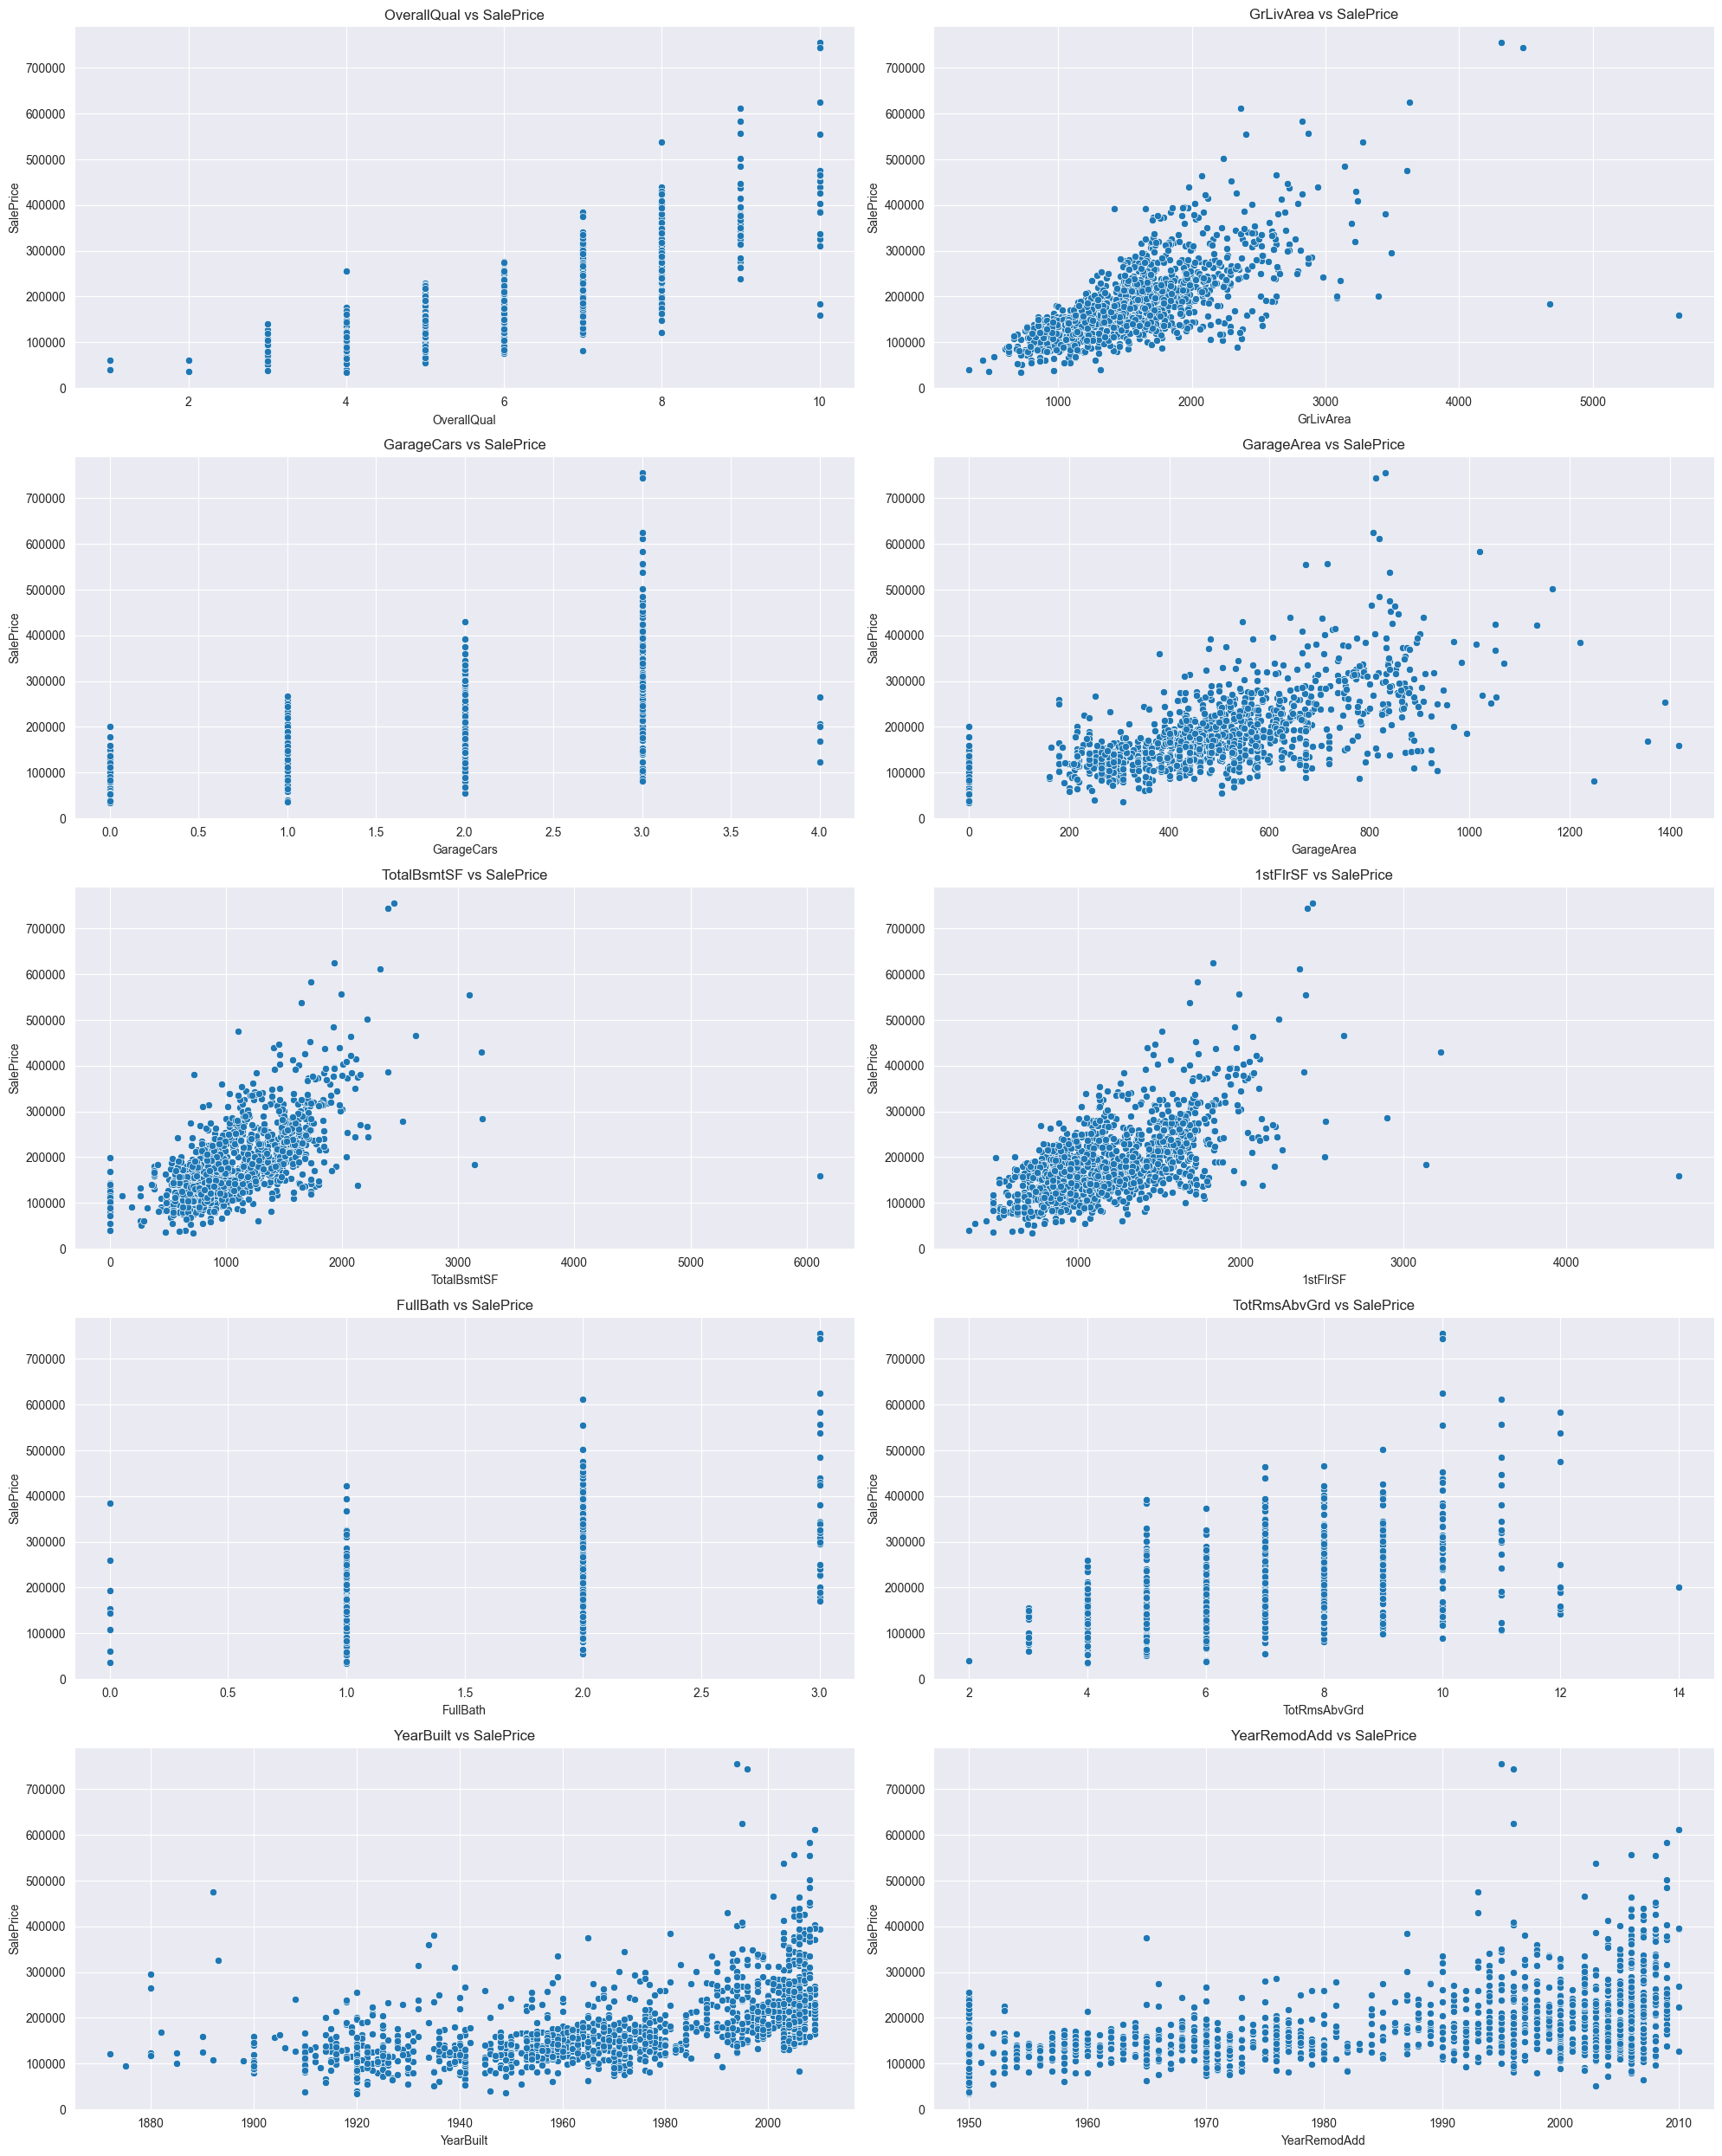

In [348]:
# 找出与目标变量相关性最强的前十个特征
top_corr_features = corrmat["SalePrice"].abs().sort_values(ascending=False).head(11).index

# 创建子图
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

# 绘制单变量分析图
for i, feature in enumerate(top_corr_features):
    if feature == 'SalePrice':
        continue
    row, col = divmod(i-1, 2)
    sns.scatterplot(x=train[feature], y=train['SalePrice'], ax=axes[row, col])
    axes[row, col].set_title(f"{feature} vs SalePrice")

plt.tight_layout()
plt.show()

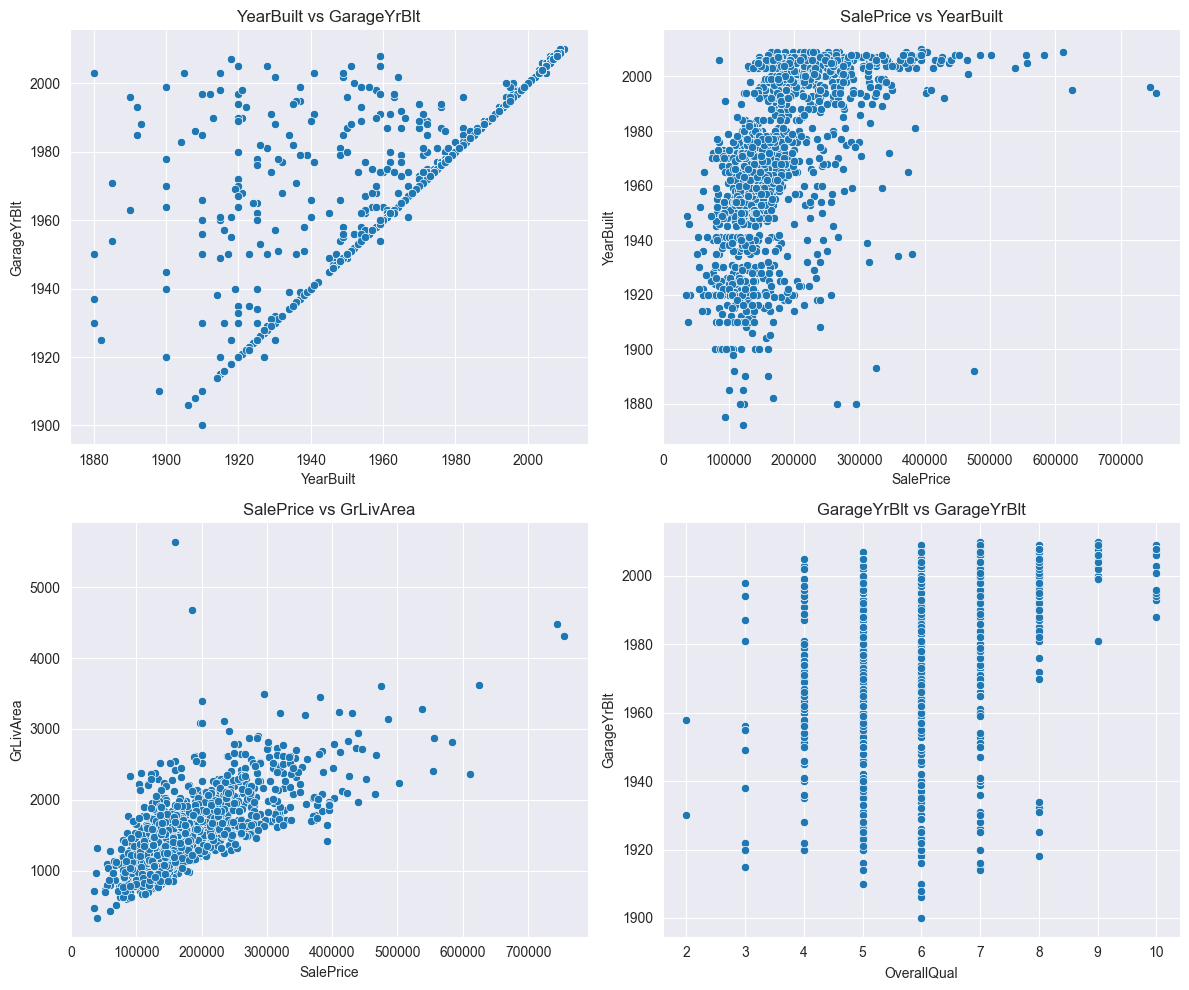

In [349]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatterplot 1
sns.scatterplot(x="YearBuilt", y="GarageYrBlt", data=train, ax=axs[0, 0])
axs[0, 0].set_title('YearBuilt vs GarageYrBlt')
sns.despine(ax=axs[0, 0])  

# Scatterplot 2
sns.scatterplot(x="SalePrice", y="YearBuilt", data=train, ax=axs[0, 1])
axs[0, 1].set_title('SalePrice vs YearBuilt')
sns.despine(ax=axs[0, 1])  

# Scatterplot 3
sns.scatterplot(x="SalePrice", y="GrLivArea", data=train, ax=axs[1, 0])
axs[1, 0].set_title('SalePrice vs GrLivArea')
sns.despine(ax=axs[1, 0])  

# Scatterplot 4
sns.scatterplot(x="OverallQual", y="GarageYrBlt", data=train, ax=axs[1, 1])
axs[1, 1].set_title('GarageYrBlt vs GarageYrBlt')
sns.despine(ax=axs[1, 1])  
plt.tight_layout()

# Plot
plt.show()

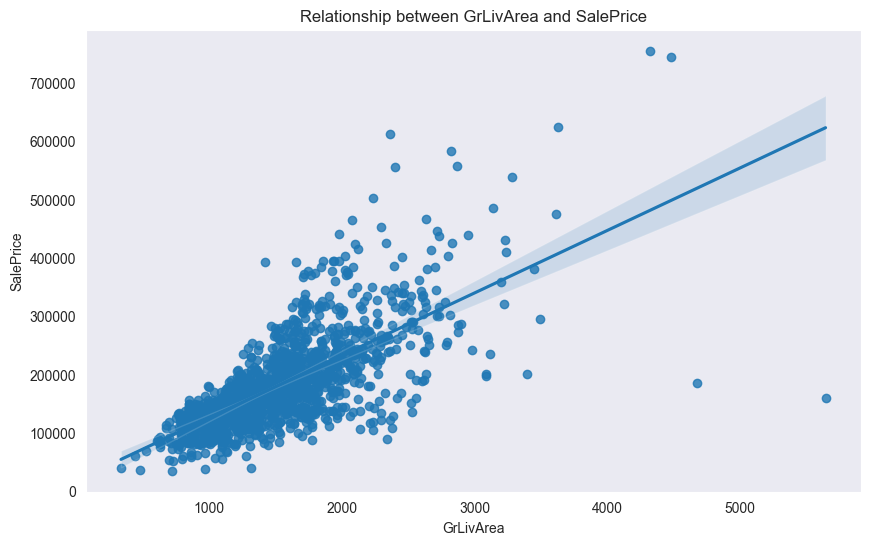

In [350]:
# Relationship between sales price and habitable area above ground (GrLivArea)
plt.figure(figsize=(10, 6))
sns.regplot(x="GrLivArea", y="SalePrice", data=train)
plt.title('Relationship between GrLivArea and SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.grid(False)
plt.show()

In [351]:
# Group the data by neighborhood and calculate the average sales price
price_by_neighborhood = train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

# Create a DataFrame from the resulting series
df_price_by_neighborhood = pd.DataFrame({'Neighborhood': price_by_neighborhood.index, 
                                         'PriceMean': price_by_neighborhood.values})
df_price_by_neighborhood.head()

Neighborhood  PriceMean
0      NoRidge 335295.317
1      NridgHt 316270.623
2      StoneBr 310499.000
3       Timber 242247.447
4      Veenker 238772.727

In [352]:
garage_proportion = train['GarageCars'].apply(lambda x: 1 if x > 0 else 0).mean()

df_garage_proportion = pd.DataFrame({'GarageProportion': [garage_proportion]})

correlation_grlivarea_saleprice = train['GrLivArea'].corr(train['SalePrice'])

df_correlation = pd.DataFrame({'Correlation_GrLivArea_SalePrice': [correlation_grlivarea_saleprice]})

df_garage_proportion.head()

GarageProportion
0             0.945

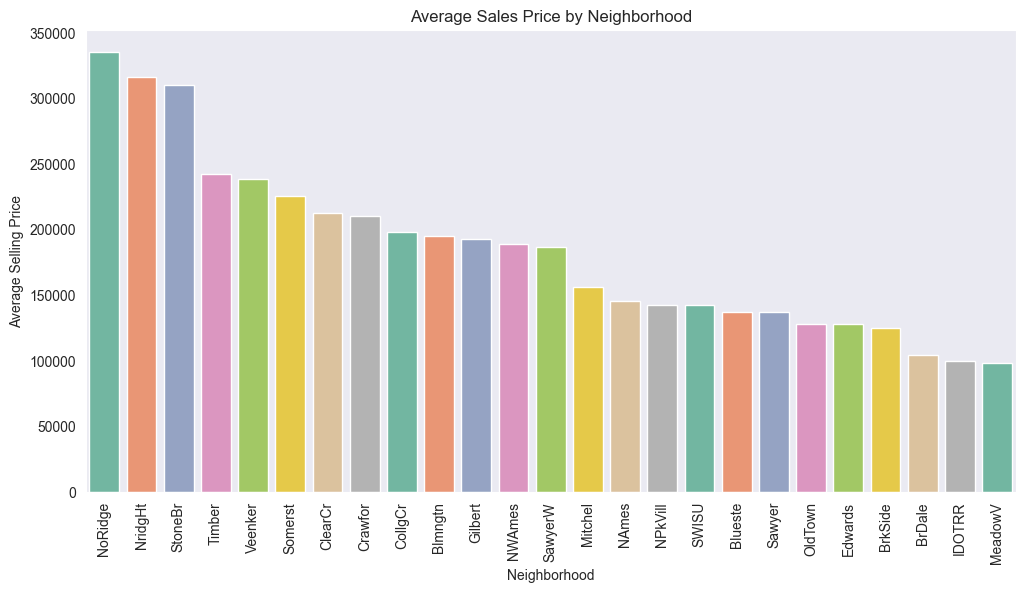

In [353]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_price_by_neighborhood, x='Neighborhood', y='PriceMean', ci=None, palette='Set2', estimator=np.mean, order=train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index)
plt.title('Average Sales Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

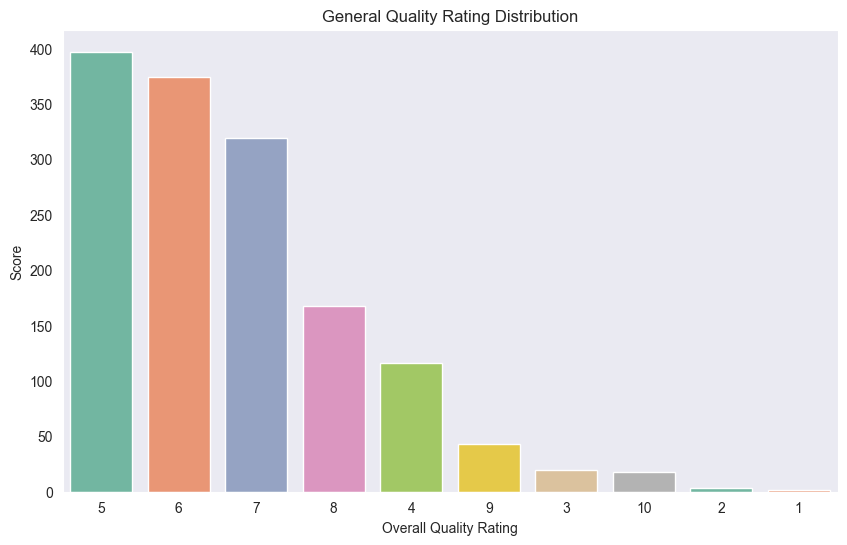

In [354]:

plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='OverallQual', palette='Set2', order=train['OverallQual'].value_counts().index)
plt.title('General Quality Rating Distribution')
plt.xlabel('Overall Quality Rating')
plt.ylabel('Score')
plt.grid(False)
plt.show()

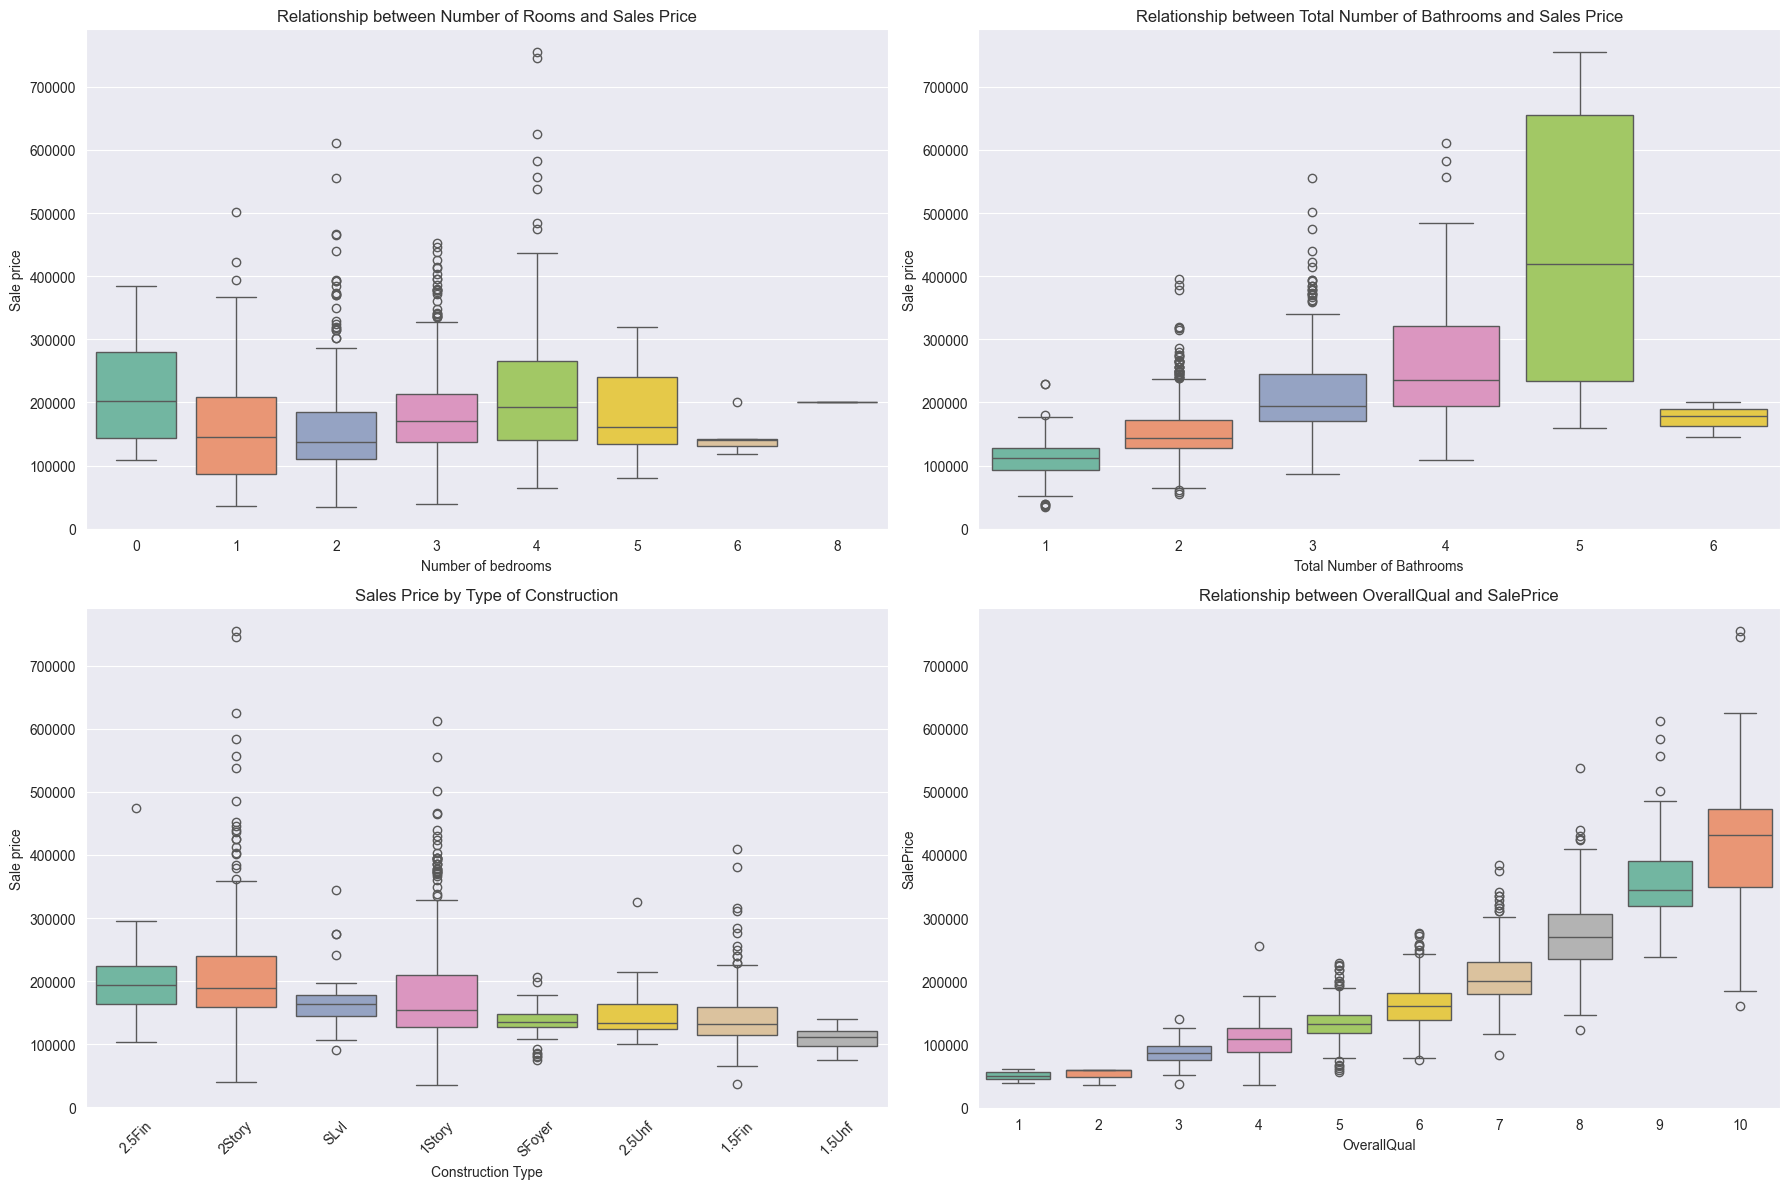

In [355]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Create the total number of bathrooms column
train['TotalBath'] = train['FullBath'] + train['HalfBath'] + train['BsmtFullBath'] + train['BsmtHalfBath']

# Boxplot of the relationship between number of rooms and sales price
sns.boxplot(data=train, x='BedroomAbvGr', y='SalePrice', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Relationship between Number of Rooms and Sales Price')
axes[0, 0].set_xlabel('Number of bedrooms')
axes[0, 0].set_ylabel('Sale price')

# Boxplot of the relationship between the number of bathrooms and the sales price
sns.boxplot(data=train, x='TotalBath', y='SalePrice', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Relationship between Total Number of Bathrooms and Sales Price')
axes[0, 1].set_xlabel('Total Number of Bathrooms')
axes[0, 1].set_ylabel('Sale price')

# Boxplot of sales price by type of construction
sns.boxplot(data=train, x='HouseStyle', y='SalePrice', palette='Set2', order=train.groupby('HouseStyle')['SalePrice'].median().sort_values(ascending=False).index, ax=axes[1, 0])
axes[1, 0].set_title('Sales Price by Type of Construction')
axes[1, 0].set_xlabel('Construction Type')
axes[1, 0].set_ylabel('Sale price')
axes[1, 0].tick_params(axis='x', rotation=45)

# Identification of outliers
sns.boxplot(data=train, x='OverallQual', y='SalePrice', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Relationship between OverallQual and SalePrice')
axes[1, 1].set_xlabel('OverallQual')
axes[1, 1].set_ylabel('SalePrice')
axes[1, 1].grid(False)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show subplots
plt.show()

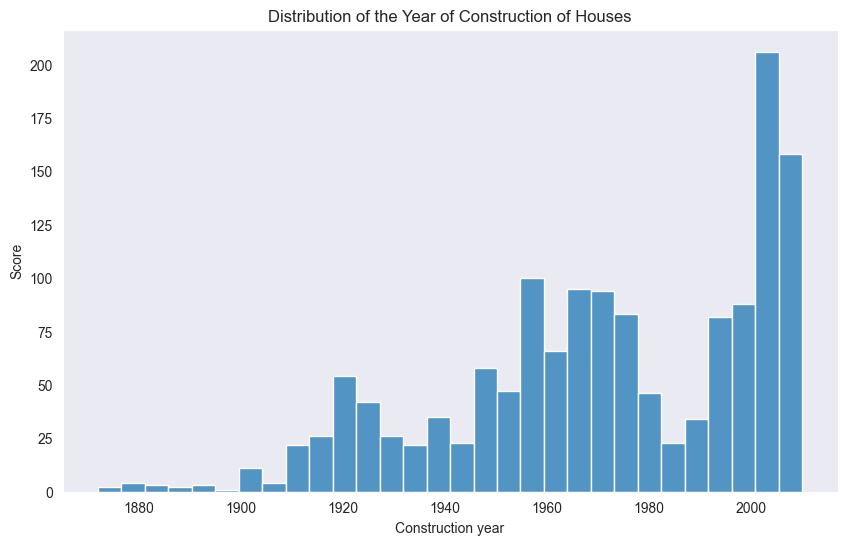

In [356]:
# Histogram of the year the houses were built
plt.figure(figsize=(10, 6))
sns.histplot(train['YearBuilt'], bins=30, kde=False, palette='Set2')
plt.title('Distribution of the Year of Construction of Houses')
plt.xlabel('Construction year')
plt.ylabel('Score')
plt.grid(False)
plt.show()

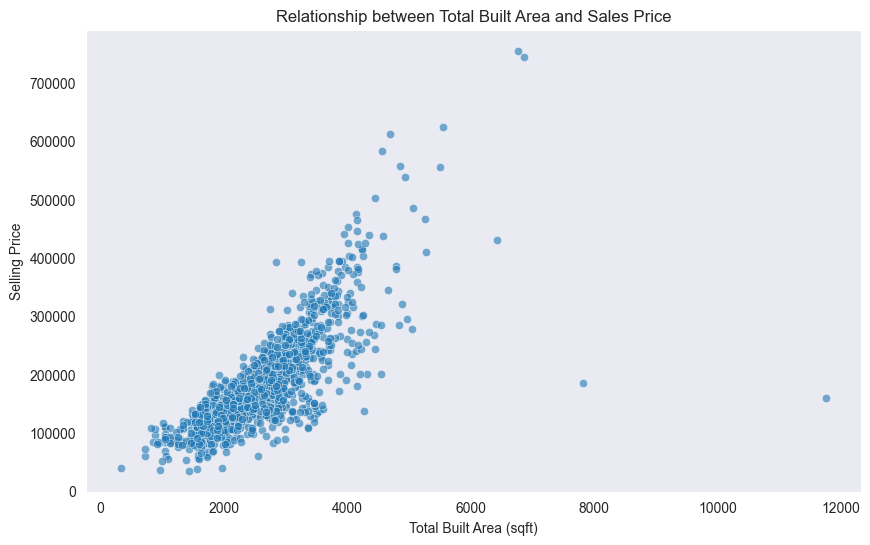

In [357]:
# Create the total built area column
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Distribution of sales price by total built area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='TotalSF', y='SalePrice', palette='Set2', alpha=0.6)
plt.title('Relationship between Total Built Area and Sales Price')
plt.xlabel('Total Built Area (sqft)')
plt.ylabel('Selling Price')
plt.grid(False)
plt.show()

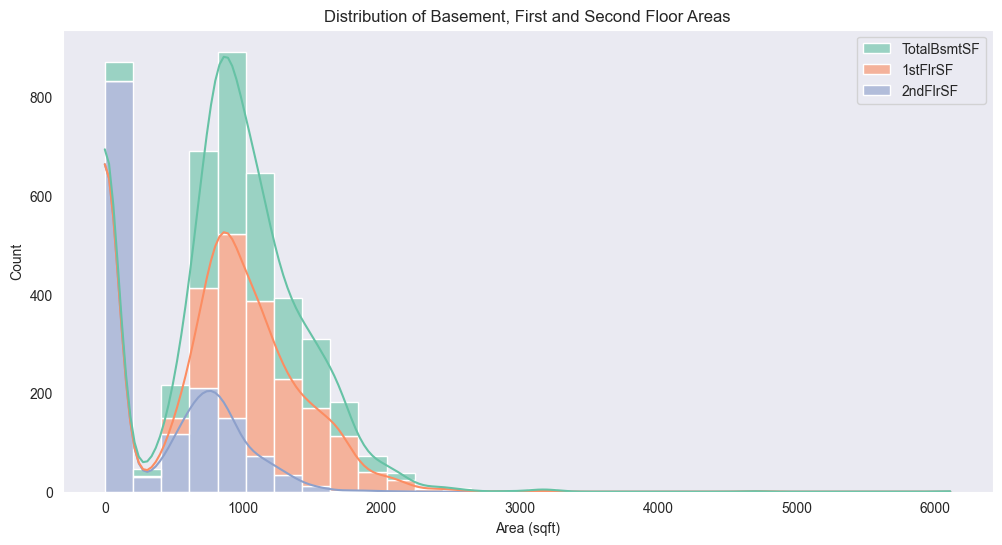

In [358]:
# Histogram of basement, first and second floor areas
plt.figure(figsize=(12, 6))
sns.histplot(train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']], palette='Set2', bins=30, kde=True, alpha=0.6, multiple='stack')
plt.title('Distribution of Basement, First and Second Floor Areas')
plt.xlabel('Area (sqft)')
plt.ylabel('Count')
plt.grid(False)
plt.show()

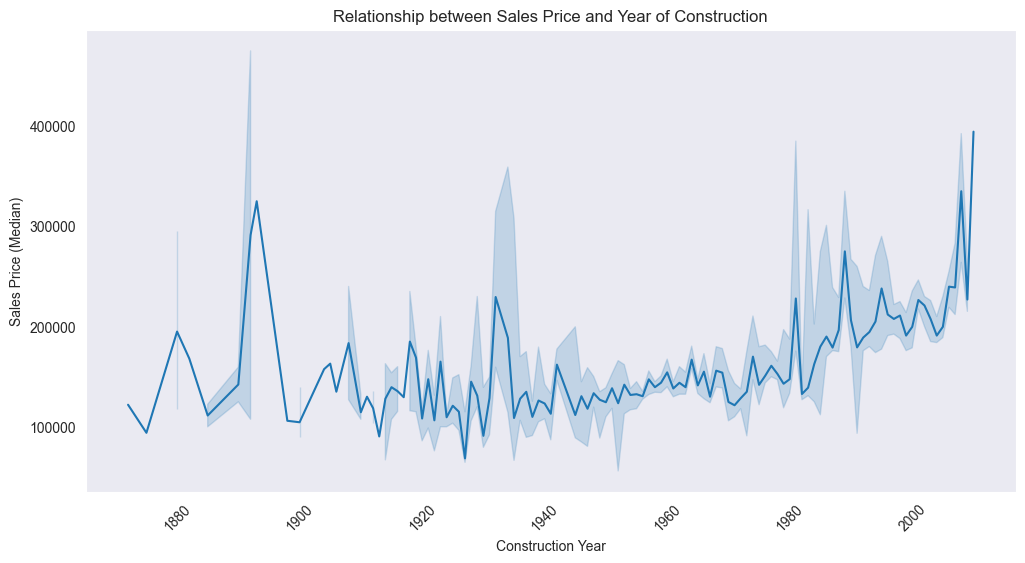

In [359]:
# Relationship between sales price and year of construction
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='YearBuilt', y='SalePrice', palette='Set2',estimator=np.median)
plt.title('Relationship between Sales Price and Year of Construction')
plt.xlabel('Construction Year')
plt.ylabel('Sales Price (Median)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


 mu = 180921.20 and sigma = 79415.29


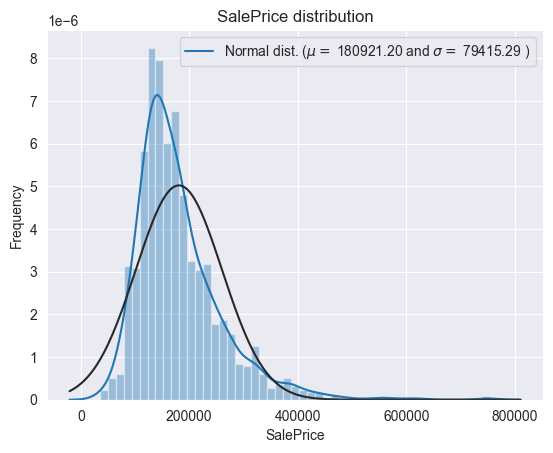

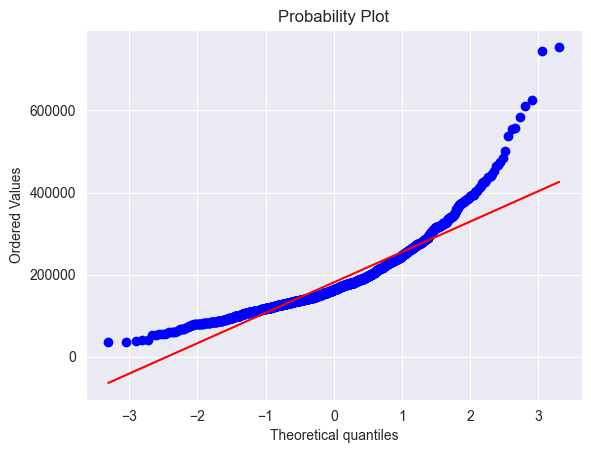

In [360]:
sns.distplot(train['SalePrice'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40


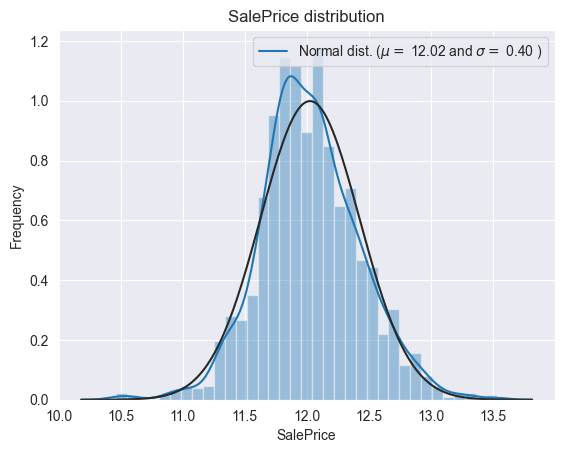

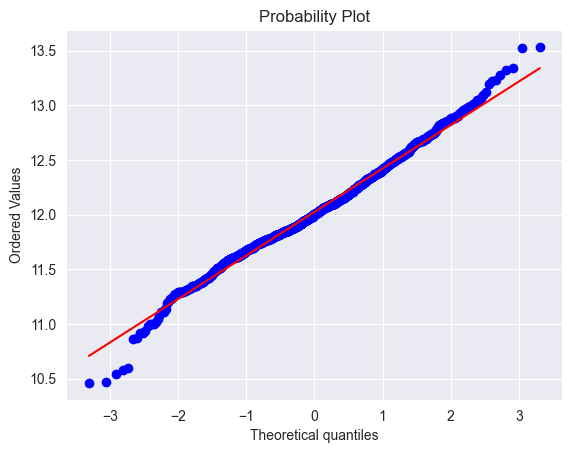

In [361]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [362]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 81)


In [363]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

Missing Ratio
PoolQC              99.657
MiscFeature         96.403
Alley               93.217
Fence               80.439
MasVnrType          60.500

Text(0.5, 1.0, 'Percent missing data by feature')

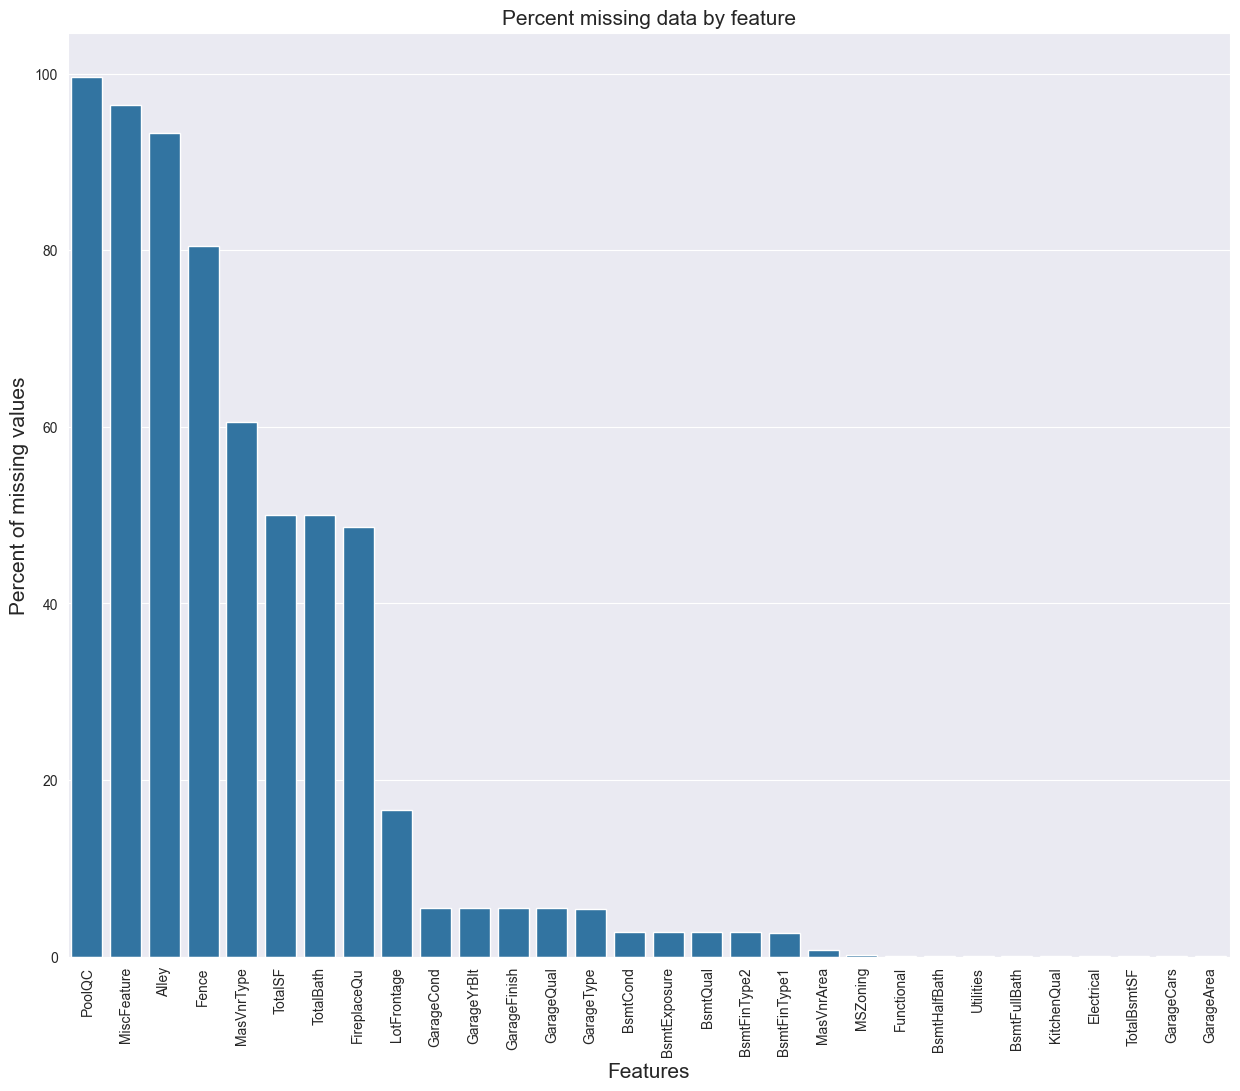

In [364]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [365]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [366]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [367]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [368]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [369]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [370]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [371]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [372]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [373]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [374]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [375]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [376]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [377]:
all_data = all_data.drop(['Utilities'], axis=1)

In [378]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [379]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [380]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [381]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [382]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [383]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [384]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()


Missing Ratio
TotalBath         49.983
TotalSF           49.983

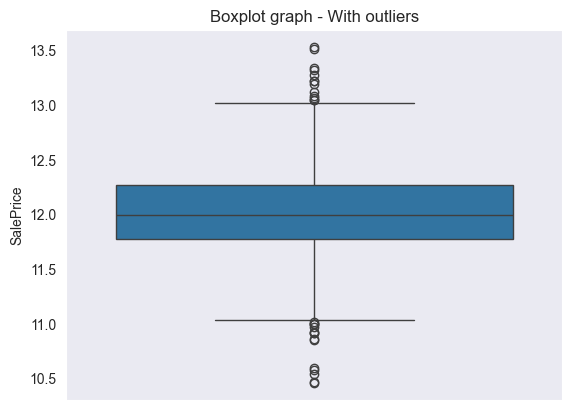

In [385]:
# Target column chart with outliers
sns.boxplot(train["SalePrice"])
plt.title("Boxplot graph - With outliers")
plt.grid(False)
plt.show()

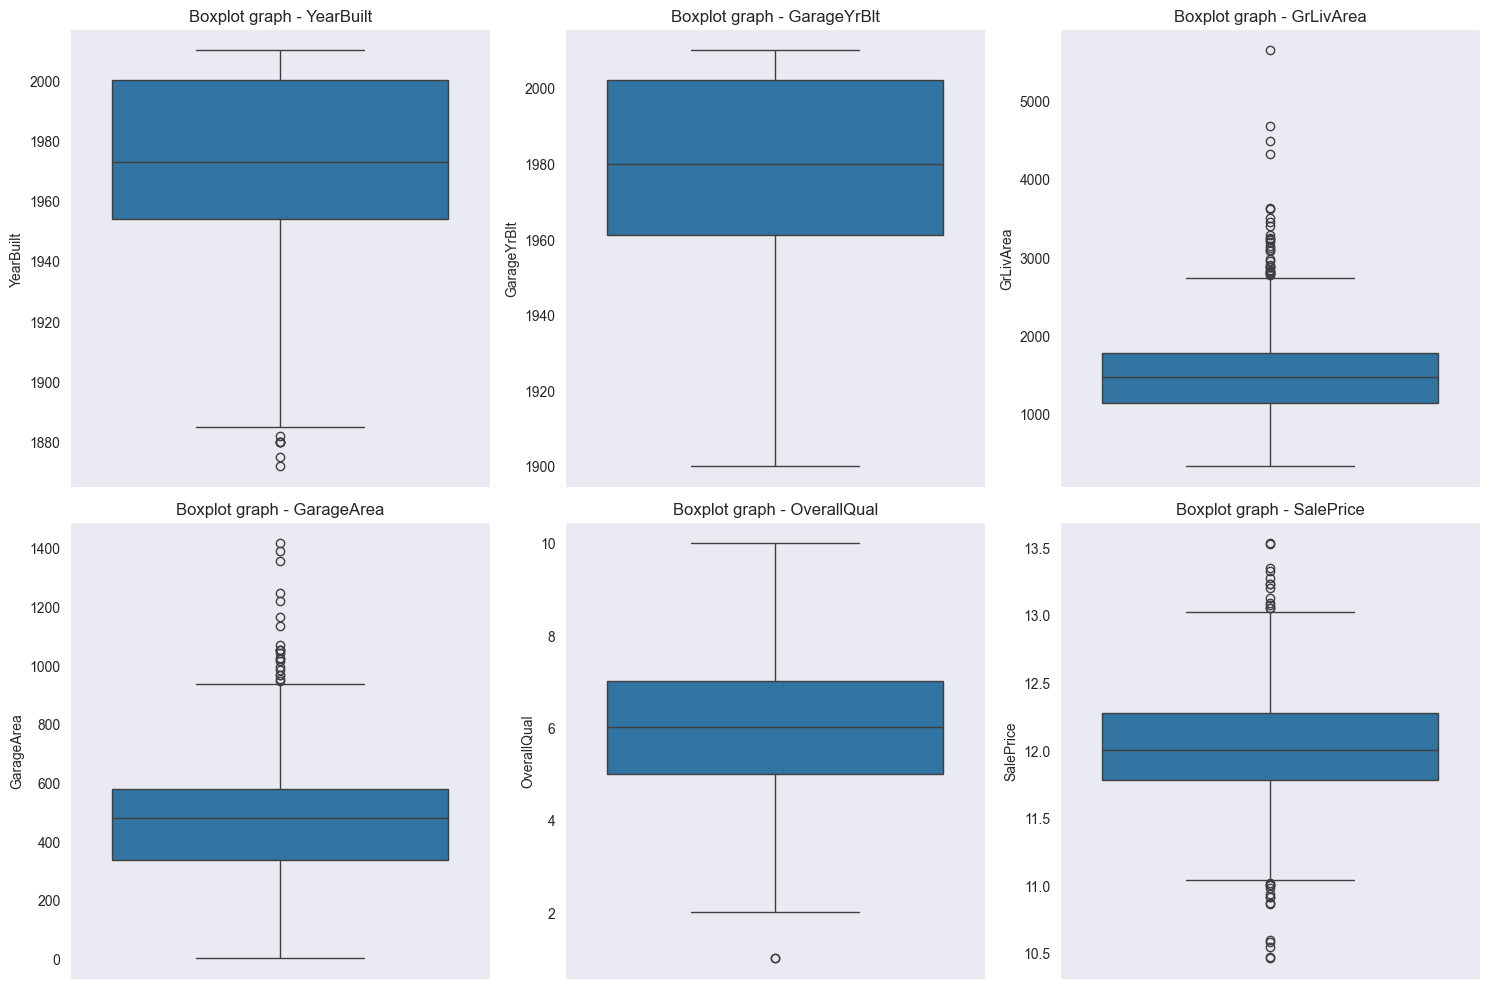

In [386]:
# Define variables for boxplots
columns = ["YearBuilt", "GarageYrBlt", "GrLivArea", "GarageArea", "OverallQual", "SalePrice"]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate over the variables and plot the boxplots
for i, column in enumerate(columns):
    sns.boxplot(train[column], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Boxplot graph - {column}")
    axes[i//3, i%3].grid(False)

# Adjust the layout
plt.tight_layout()
plt.show()

In [387]:
# interest column
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 0.3 * IQR

# Remove outliers
train = train[(train['SalePrice'] >= lower_bound) & (train['SalePrice'] <= upper_bound)]

def remove_outliers(data, column, m=3):
    mean = np.mean(data[column])
    std_dev = np.std(data[column])
    lower_bound = mean - m * std_dev
    upper_bound = mean + m * std_dev
    return lower_bound, upper_bound

# Define the variables of interest
columns = ["YearBuilt", "GarageYrBlt", "GrLivArea", "GarageArea", "OverallQual", "SalePrice"]

# Set a standard deviation threshold multiplied by m
m = 3

for columns in columns:
    lower_bound, upper_bound = remove_outliers(train, column, m)
    train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]

# Reset the index
train.reset_index(drop=True, inplace=True)

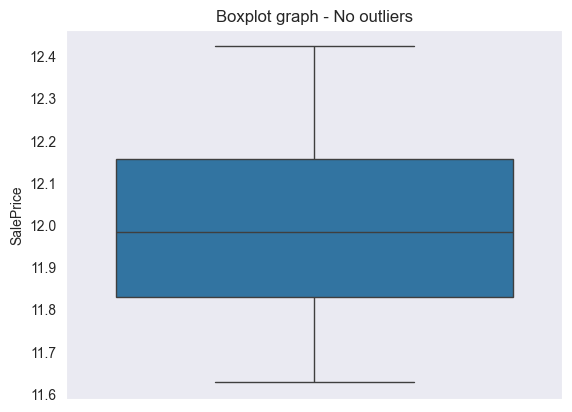

In [388]:
# Graph without outliers applying outlier removal
sns.boxplot(train["SalePrice"])
plt.title("Boxplot graph - No outliers")
plt.grid(False)
plt.show()

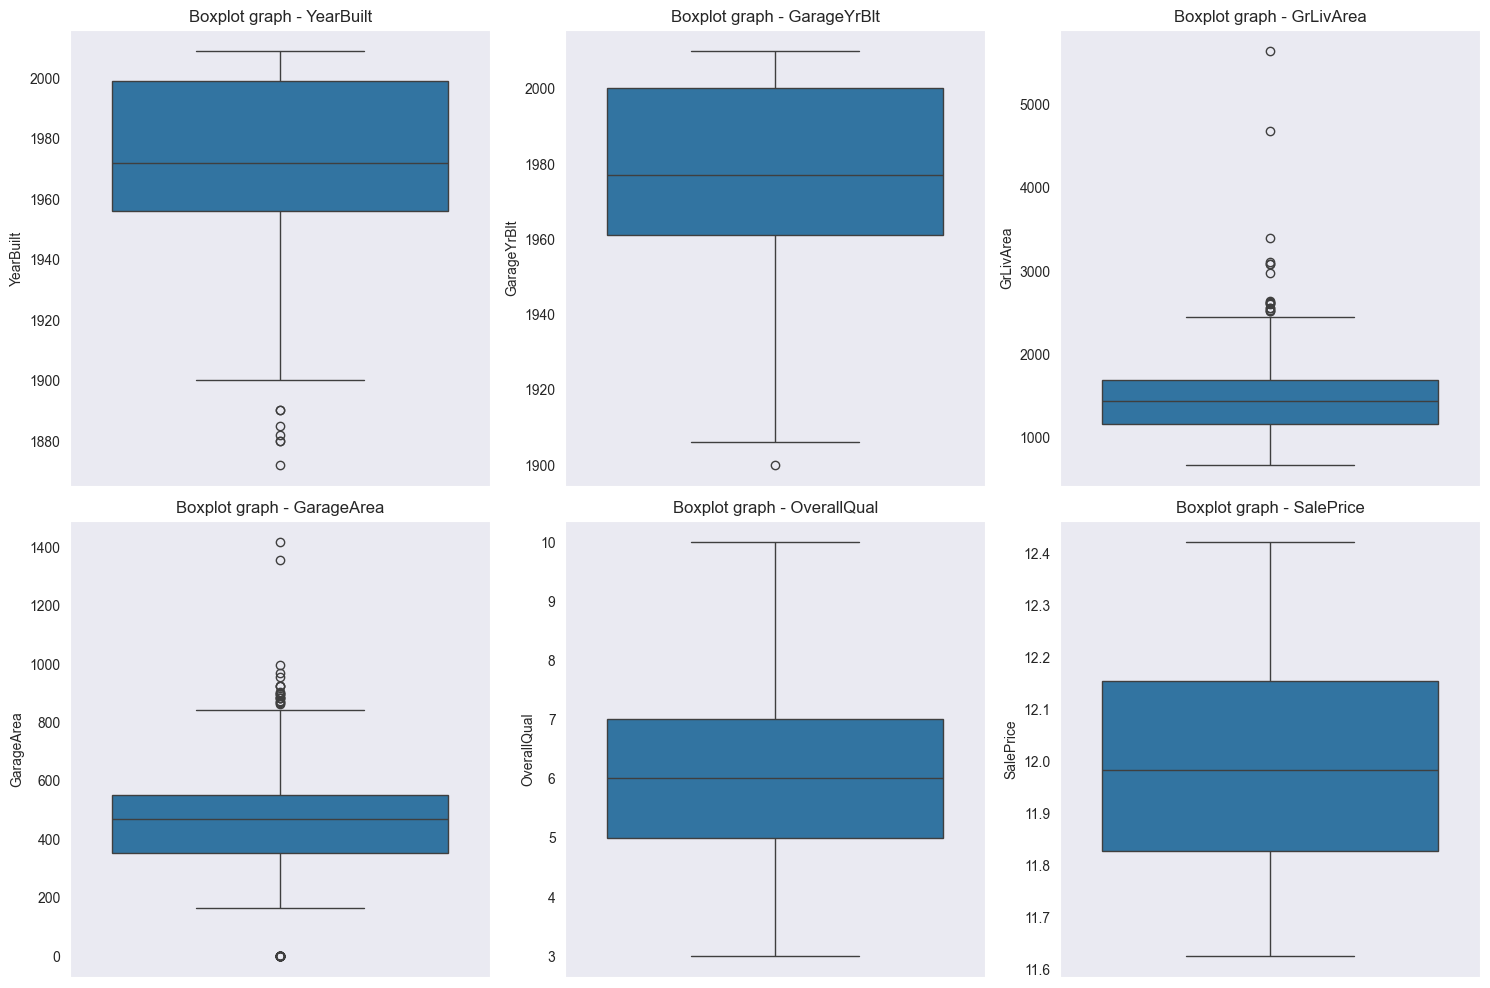

In [389]:
# Define variables for boxplots
columns = ["YearBuilt", "GarageYrBlt", "GrLivArea", "GarageArea", "OverallQual", "SalePrice"]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate over the variables and plot the boxplots
for i, column in enumerate(columns):
    sns.boxplot(train[column], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Boxplot graph - {column}")
    axes[i//3, i%3].grid(False)

# Adjust the layout
plt.tight_layout()
plt.show()

In [390]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [391]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 80)


In [392]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [393]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 


Skew
MiscVal       21.947
PoolArea      16.898
LotArea       12.822
LowQualFinSF  12.089
3SsnPorch     11.376
LandSlope      4.975
KitchenAbvGr   4.302
BsmtFinSF2     4.146
EnclosedPorch  4.004
ScreenPorch    3.947

In [394]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)


There are 60 skewed numerical features to Box Cox transform


In [395]:
all_data = pd.get_dummies(all_data)

print(all_data.shape)

(2919, 222)


In [396]:
all_data = all_data.drop(['TotalBath'], axis=1)

In [397]:
train = all_data[:ntrain]
test = all_data[ntrain:]


In [413]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb

In [399]:
def plot_residuals(y_true, y_pred, model_name='Model'):
  
    residuals = y_true - y_pred

    # 创建残差图
    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_pred, y=residuals, line_kws={'color': 'red', 'lw': 1})
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()


In [400]:

#Validation function
n_folds = 5

def r2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    r2_scores = cross_val_score(model, train.values, y_train, scoring="r2", cv=kf)
    return r2_scores

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def evaluate_model(model,model_name):
    rmse_score = rmse_cv(model)
    r2_score = r2_cv(model)
    print(f"\n Performance of {model_name}:")
    print("RMSE score: {:.4f} ({:.4f})".format(rmse_score.mean(), rmse_score.std()))
    print("R² score: {:.4f} ({:.4f})".format(r2_score.mean(), r2_score.std()))
    
# 训练模型并进行预测
    model.fit(train.values, y_train)
    train_pred = model.predict(train.values)
    
    # 绘制实际值与预测值的对比图
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_pred, alpha=0.6)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.grid(True)
    plt.show()


 Performance of Lasso:
RMSE score: 0.1240 (0.0165)
R² score: 0.9021 (0.0240)


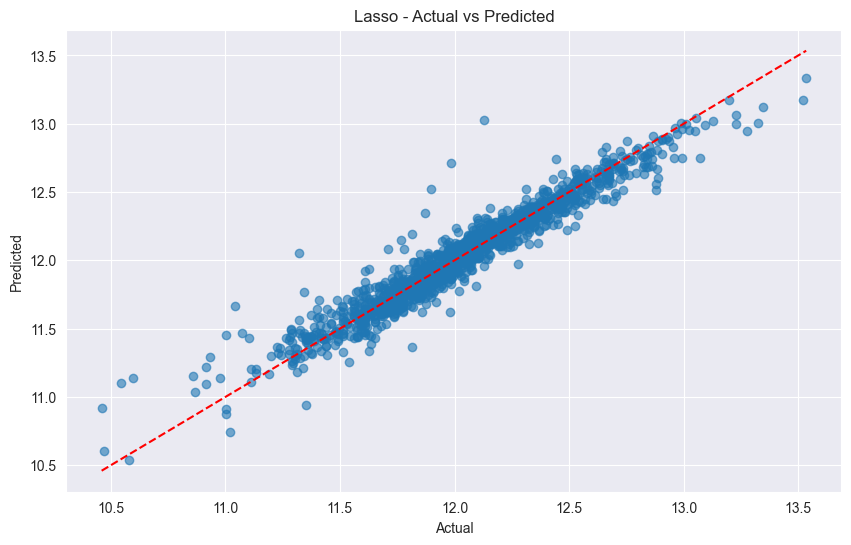

In [401]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

evaluate_model(lasso,"Lasso")


 Performance of ENet:
RMSE score: 0.1240 (0.0165)
R² score: 0.9020 (0.0241)


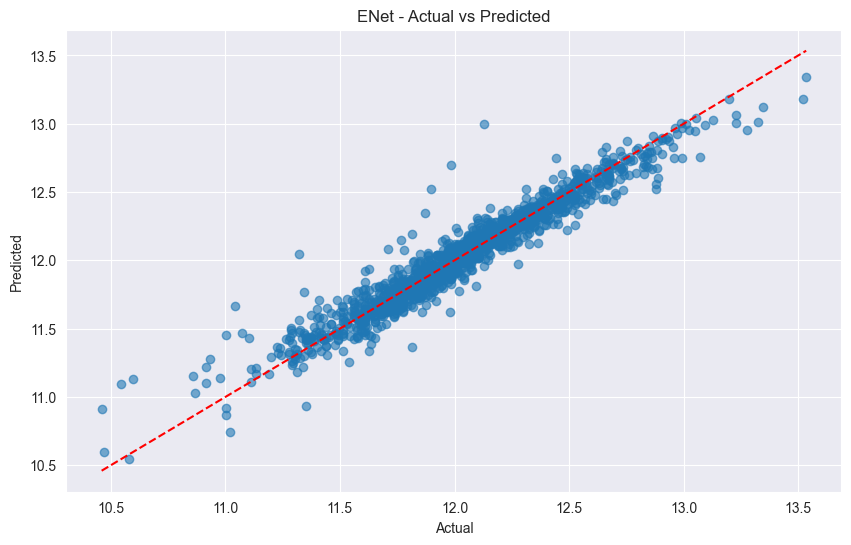

In [402]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

evaluate_model(ENet,"ENet")


 Performance of GBoost:
RMSE score: 0.1233 (0.0122)
R² score: 0.9041 (0.0130)


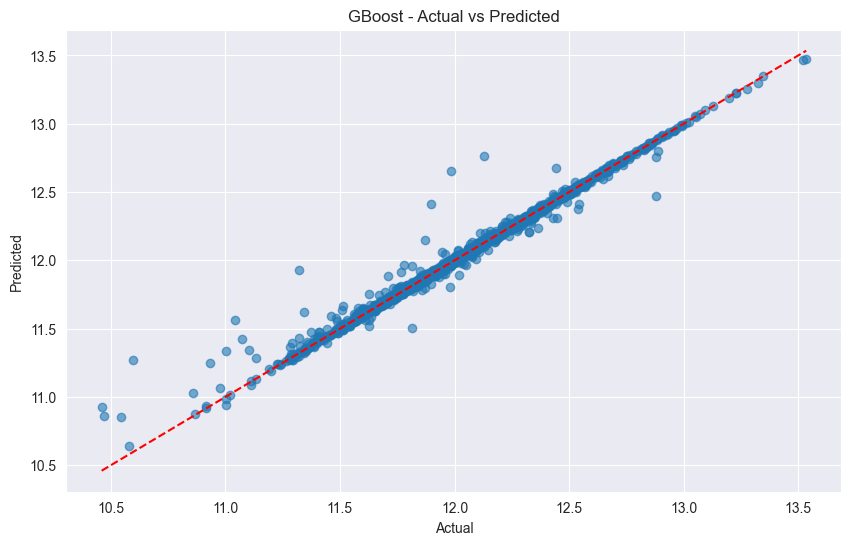

In [403]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

evaluate_model(GBoost,"GBoost")


 Performance of XGBoost:
RMSE score: 0.1251 (0.0112)
R² score: 0.9013 (0.0131)


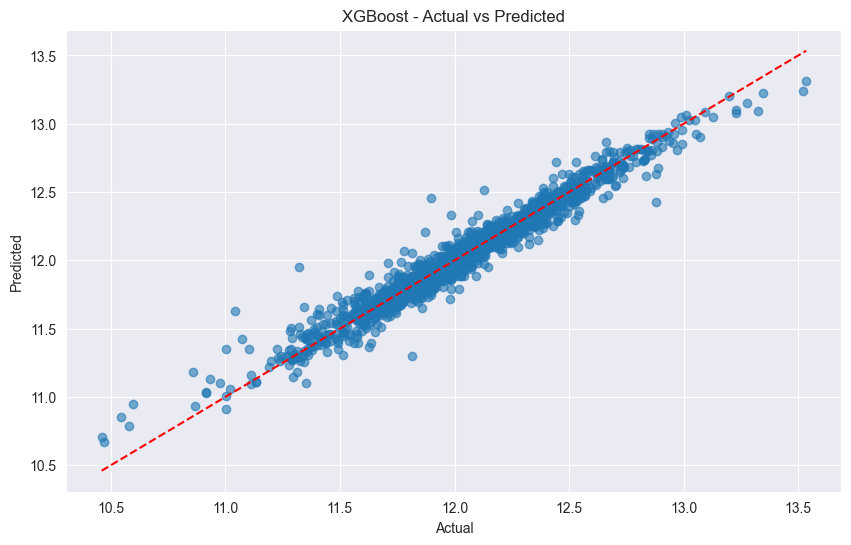

In [404]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

evaluate_model(model_xgb,"XGBoost")

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=5 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

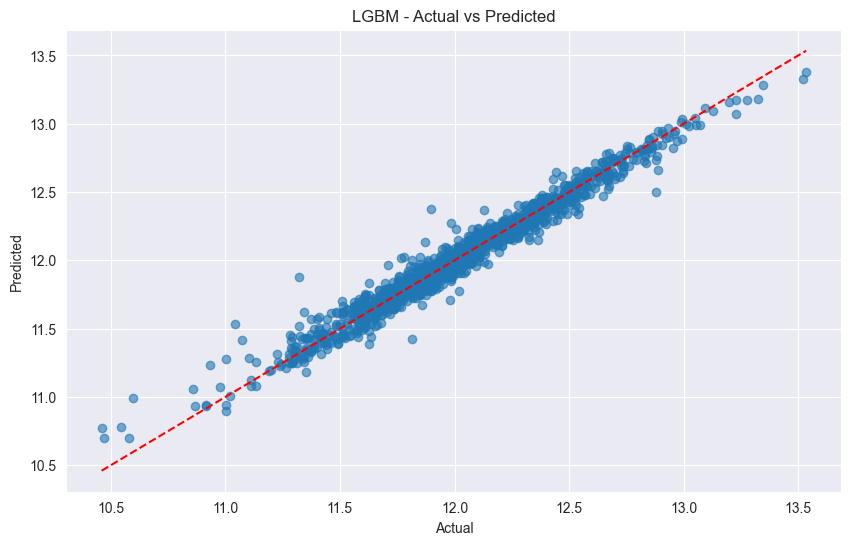

In [405]:
model_lgb = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin=55,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.2319,
    min_data_in_leaf=6,
    min_sum_hessian_in_leaf=11,
    subsample=0.8,
    subsample_freq=5
)

evaluate_model(model_lgb,"LGBM")


 Performance of Decision Tree:
RMSE score: 0.1889 (0.0102)
R² score: 0.7749 (0.0163)


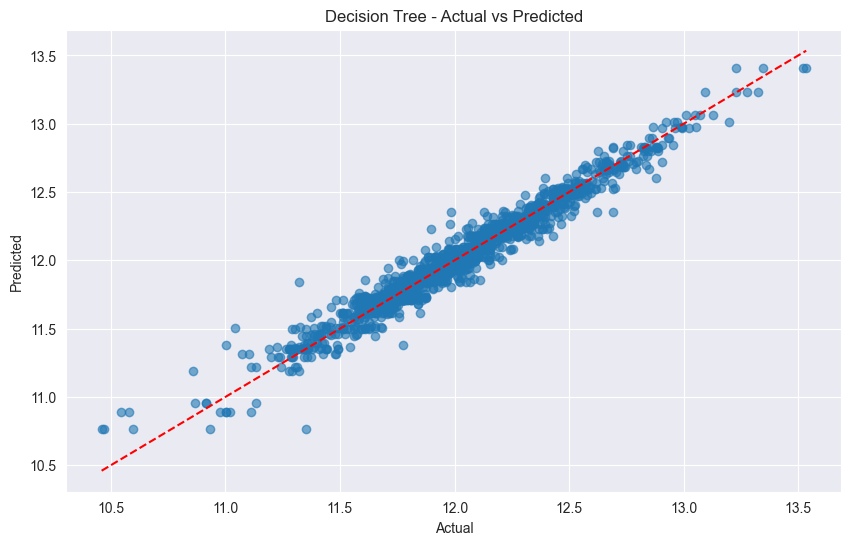

In [406]:
# 决策树回归
model_dtr = make_pipeline(
    RobustScaler(),
    DecisionTreeRegressor(
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=4
    )
)
evaluate_model(model_dtr,"Decision Tree")

Best parameters found:  {'lasso__alpha': 0.0006}
Best CV score: 0.1250

 Performance of Best Lasso:
RMSE score: 0.1240 (0.0161)
R² score: 0.9021 (0.0237)


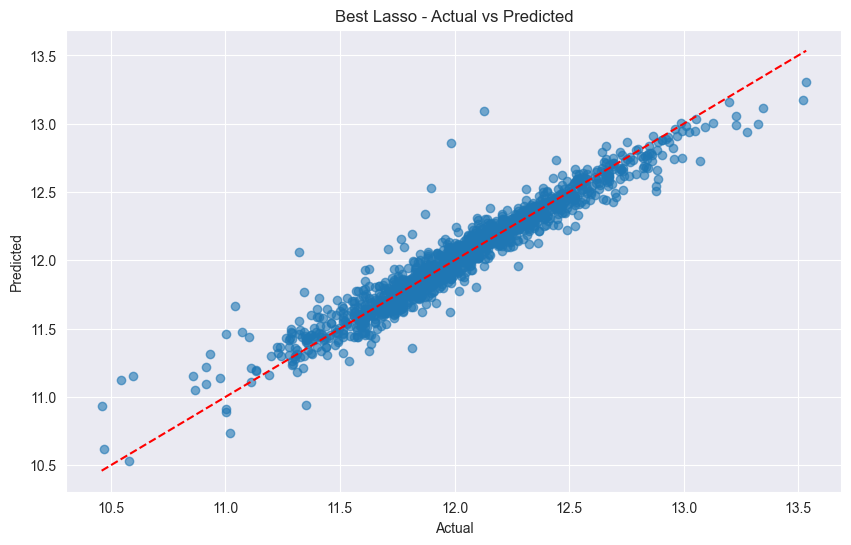

In [407]:
# 定义参数网格
param_grid = {
    'lasso__alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001, 0.005, 0.01]
}

# 网格搜索
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(all_data[:ntrain], y_train)

# 打印最佳参数和评分
print("Best parameters found: ", grid_search.best_params_)
print("Best CV score: {:.4f}".format(np.sqrt(-grid_search.best_score_)))

# 使用最佳参数重新训练模型并进行交叉验证
best_lasso = grid_search.best_estimator_
evaluate_model(best_lasso,"Best Lasso")

Best parameters found:  {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.5}
Best CV score: 0.1249

 Performance of Best ENet:
RMSE score: 0.1239 (0.0158)
R² score: 0.9022 (0.0234)


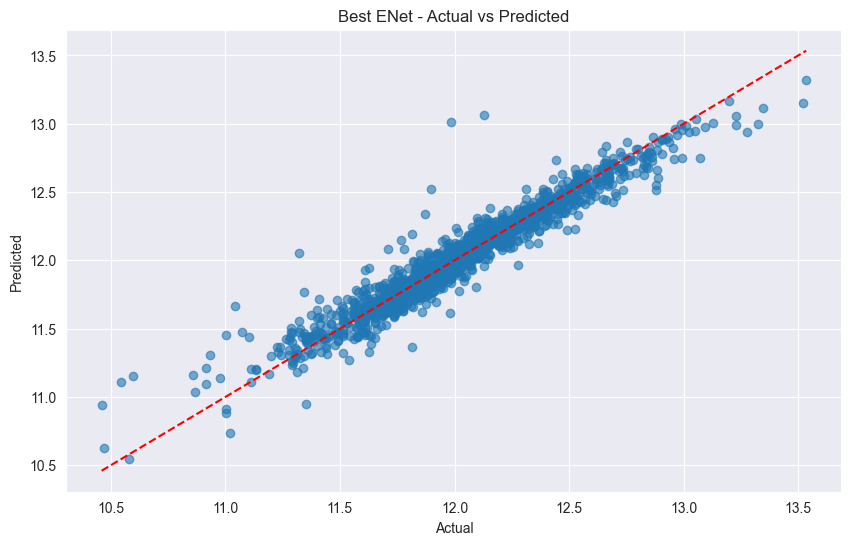

In [408]:
# 定义参数网格
param_grid = {
    'elasticnet__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01],
    'elasticnet__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# 网格搜索
grid_search = GridSearchCV(ENet, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(all_data[:ntrain], y_train)

# 打印最佳参数和评分
print("Best parameters found: ", grid_search.best_params_)
print("Best CV score: {:.4f}".format(np.sqrt(-grid_search.best_score_)))
 
# 使用最佳参数重新训练模型并进行交叉验证
best_enet = grid_search.best_estimator_
evaluate_model(best_enet,"Best ENet")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'colsample_bytree': 0.7172259222441357, 'learning_rate': 0.035368217387313876, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 737, 'subsample': 0.5281516378409187}

 Performance of Best XGBoost:
RMSE score: 0.1208 (0.0094)
R² score: 0.9080 (0.0096)


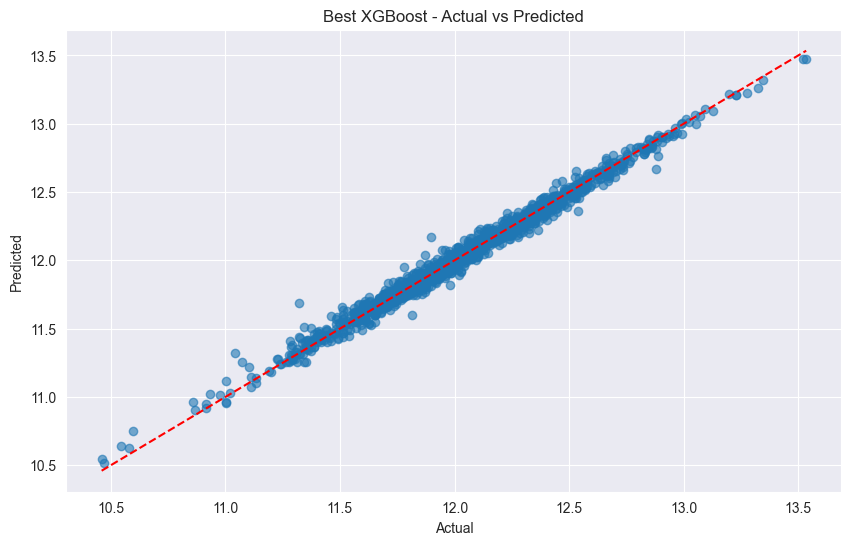

In [416]:
# 使用 RandomizedSearchCV 对 XGBRegressor 进行调参
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 8),
    'min_child_weight': randint(1, 6),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'n_estimators': randint(100, 1000)
}

xgb = XGBRegressor(random_state=7)

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                   n_jobs=-1, verbose=1, random_state=42)
random_search.fit(train.values, y_train)

# 输出最佳参数
print("Best parameters found: ", random_search.best_params_)

# 使用最佳参数进行预测和评估
best_xgb = random_search.best_estimator_
evaluate_model(best_xgb, "Best XGBoost")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 3000}

 Performance of GBoost:
RMSE score: 0.1215 (0.0123)
R² score: 0.9070 (0.0131)


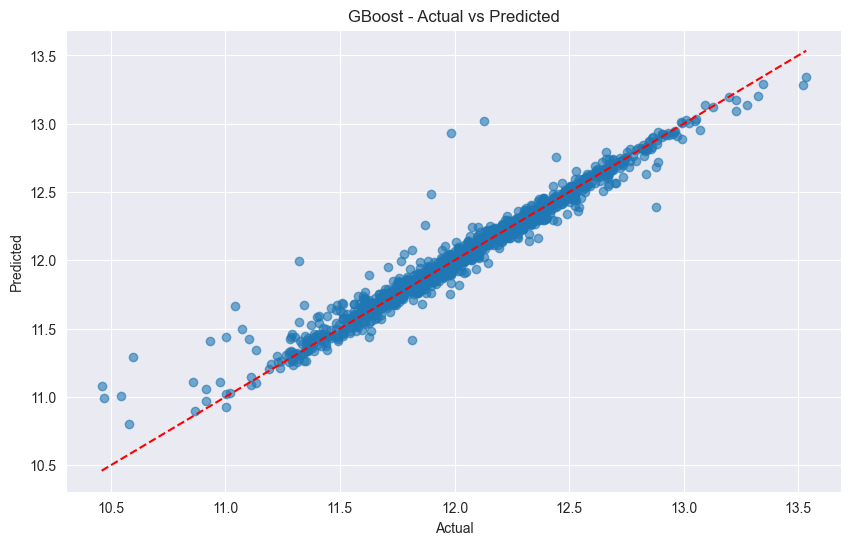

In [410]:
# 使用 GridSearchCV 对 GBoost 进行调参
param_grid = {
    'n_estimators': [1000, 3000],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 15],
    'min_samples_split': [5, 10],
    'loss': ['huber']
}

GBoost = GradientBoostingRegressor(random_state=5)
grid_search = GridSearchCV(estimator=GBoost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(train.values, y_train)

# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数进行预测和评估
best_gboost = grid_search.best_estimator_
evaluate_model(best_gboost, model_name='GBoost')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.3297380084021096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3297380084021096
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.9677676995469933, subsample=0.8281323365878769 will be ignored. Current value: bagging_fraction=0.9677676995469933
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=8 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.3297380084021096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

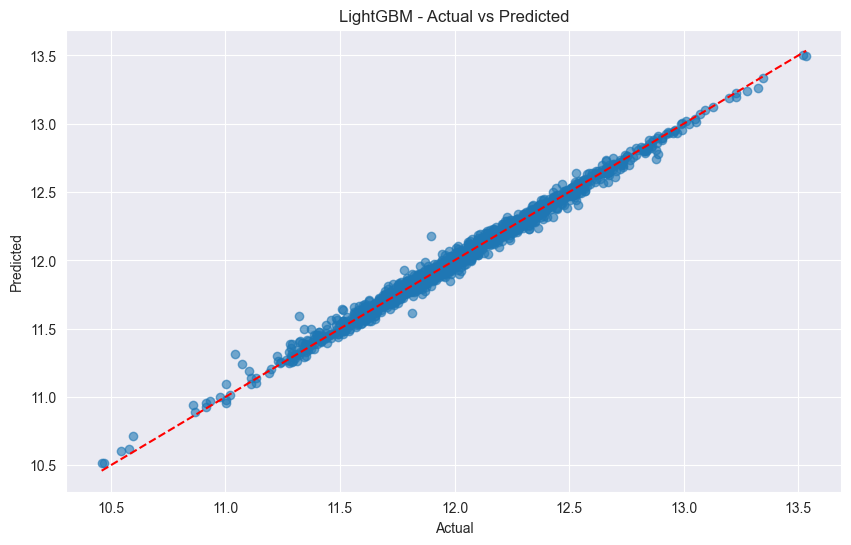

In [414]:
# 使用 RandomizedSearchCV 对 LGBMRegressor 进行调参
param_distributions = {
    'num_leaves': randint(5, 20),
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(500, 1000),
    'max_bin': randint(55, 255),
    'bagging_fraction': uniform(0.7, 0.3),
    'bagging_freq': randint(5, 10),
    'feature_fraction': uniform(0.2, 0.4),
    'min_data_in_leaf': randint(5, 20),
    'min_sum_hessian_in_leaf': randint(5, 20),
    'subsample': uniform(0.7, 0.3),
    'subsample_freq': randint(5, 10)
}

model_lgb = lgb.LGBMRegressor(
    objective='regression',
    random_state=5
)

random_search = RandomizedSearchCV(estimator=model_lgb, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                   n_jobs=-1, verbose=1, random_state=42)
random_search.fit(train.values, y_train)

# 输出最佳参数
print("Best parameters found: ", random_search.best_params_)

# 使用最佳参数进行预测和评估
best_lgb = random_search.best_estimator_
evaluate_model(best_lgb, model_name='LightGBM')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'decisiontreeregressor__max_depth': 9, 'decisiontreeregressor__min_samples_leaf': 5, 'decisiontreeregressor__min_samples_split': 8}

 Performance of Decision Tree Regressor:
RMSE score: 0.1834 (0.0130)
R² score: 0.7877 (0.0225)


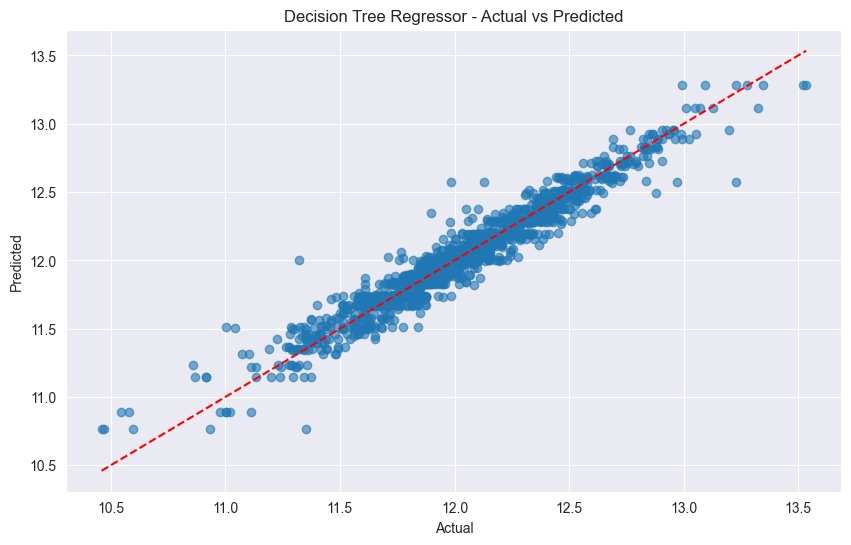

In [415]:
# 使用 RandomizedSearchCV 对 DecisionTreeRegressor 进行调参
param_distributions = {
    'decisiontreeregressor__max_depth': randint(5, 20),
    'decisiontreeregressor__min_samples_split': randint(2, 10),
    'decisiontreeregressor__min_samples_leaf': randint(1, 6)
}

model_dtr = make_pipeline(
    RobustScaler(),
    DecisionTreeRegressor(random_state=42)
)

random_search = RandomizedSearchCV(estimator=model_dtr, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                   n_jobs=-1, verbose=1, random_state=42)
random_search.fit(train.values, y_train)

# 输出最佳参数
print("Best parameters found: ", random_search.best_params_)

# 使用最佳参数进行预测和评估
best_dtr = random_search.best_estimator_
evaluate_model(best_dtr, model_name='Decision Tree Regressor')

In [458]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3398
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 142
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3410
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 139
[LightGBM] [Info] Start training from score 12.023288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3402
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 141
[LightGBM] [Info] Start t

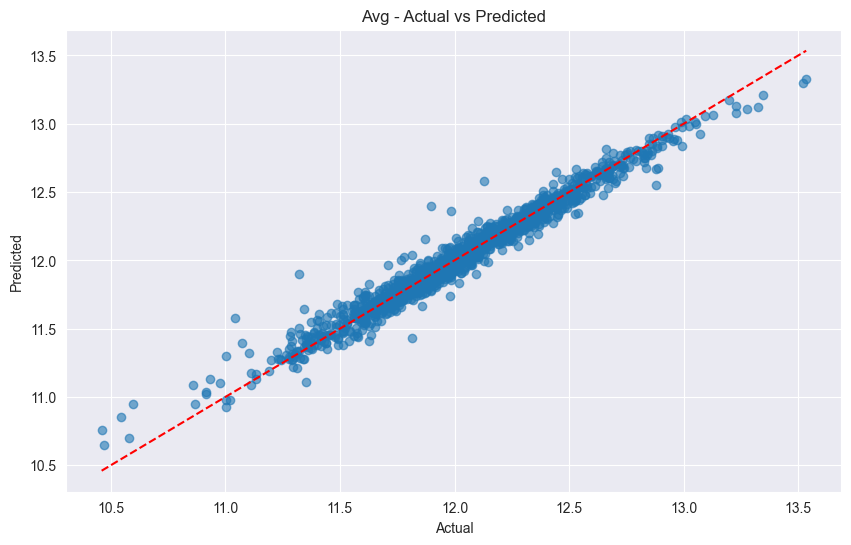

In [459]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_xgb, model_lgb))

evaluate_model(averaged_models,"Avg")

In [460]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


 Performance of Stacking:
RMSE score: 0.1191 (0.0135)
R² score: 0.9100 (0.0180)


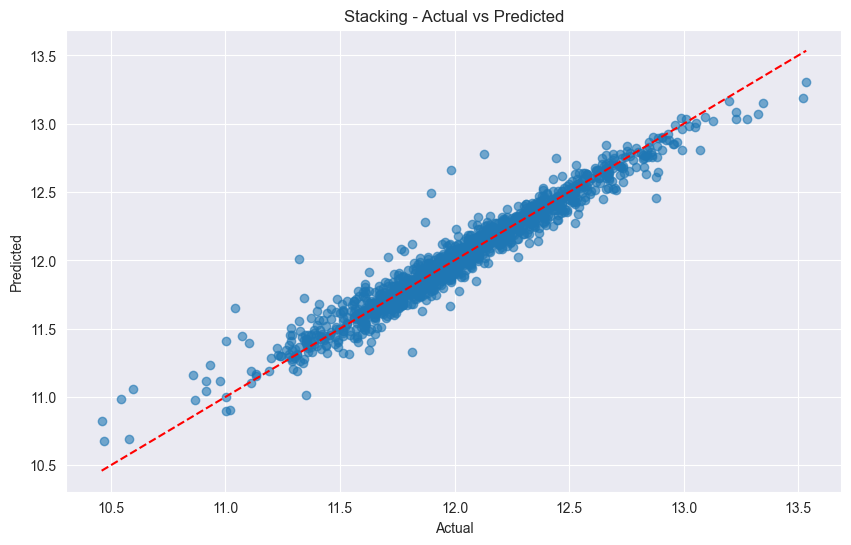

In [462]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, model_xgb),
                                                 meta_model = lasso)

evaluate_model(stacked_averaged_models,"Stacking")

In [464]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
def r2(y, y_pred):
    return r2_score(y, y_pred)

In [465]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

print("RMSE: {:.4f}".format(rmse(y_train, stacked_train_pred)))
print("R² score: {:.4f}".format(r2(y_train, stacked_train_pred)))

RMSE: 0.0947
R² score: 0.9438


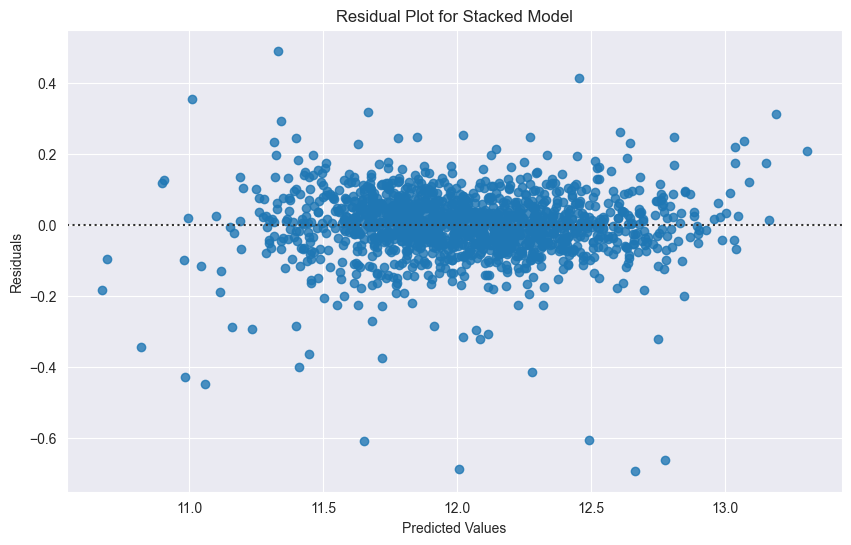

In [466]:
plot_residuals(y_train, stacked_train_pred, model_name='Stacked Model')

In [467]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test.values))

print("RMSE: {:.4f}".format(rmse(y_train, xgb_train_pred)))
print("R² score: {:.4f}".format(r2(y_train, xgb_train_pred)))

RMSE: 0.0865
R² score: 0.9531


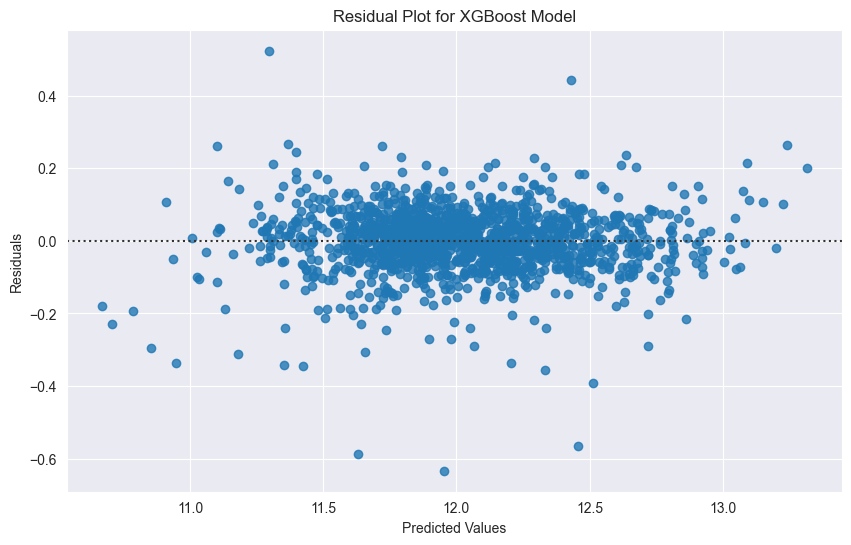

In [468]:
plot_residuals(y_train, xgb_train_pred, model_name='XGBoost Model')

In [469]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))

print("RMSE: {:.4f}".format(rmse(y_train, lgb_train_pred)))
print("R² score: {:.4f}".format(r2(y_train, lgb_train_pred)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3683
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 147
[LightGBM] [Info] Start training from score 12.024057
RMSE: 0.0468
R² score: 0.9863


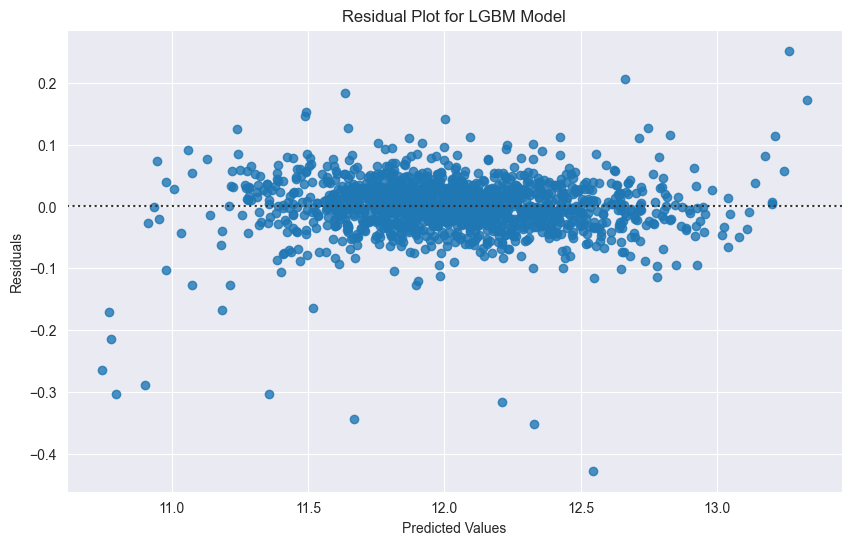

In [470]:
plot_residuals(y_train, lgb_train_pred, model_name='LGBM Model')

In [471]:
lasso.fit(train, y_train)

lasso_train_pre = lasso.predict(train)
lasso_pred = np.expm1(lasso.predict(test.values))

print("RMSE: {:.4f}".format(rmse(y_train, lasso_train_pre)))
print("R² score: {:.4f}".format(r2(y_train, lasso_train_pre)))

RMSE: 0.1068
R² score: 0.9285


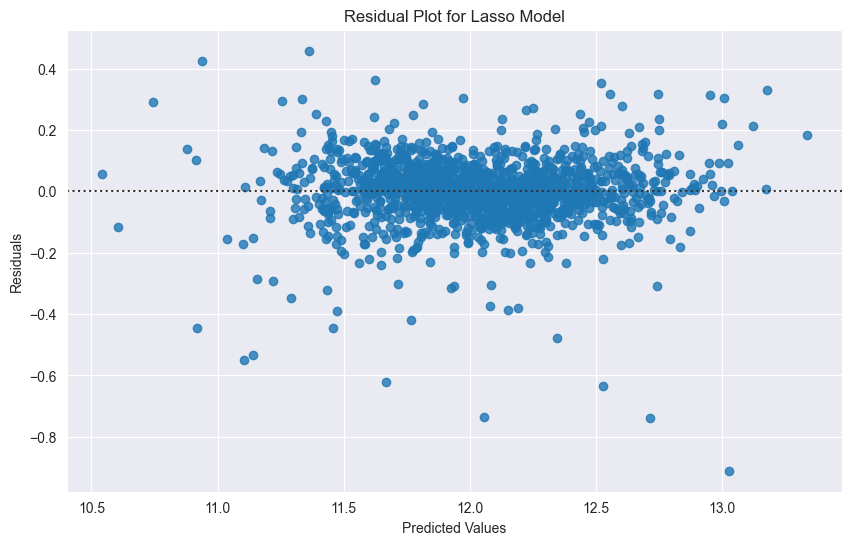

In [472]:
plot_residuals(y_train, lasso_train_pre, model_name='Lasso Model')

In [473]:
ENet.fit(train, y_train)

ENet_train_pre = ENet.predict(train)
ENet_pred = np.expm1(ENet.predict(test.values))

print("RMSE: {:.4f}".format(rmse(y_train, ENet_train_pre)))
print("R² score: {:.4f}".format(r2(y_train, ENet_train_pre)))

RMSE: 0.1060
R² score: 0.9295


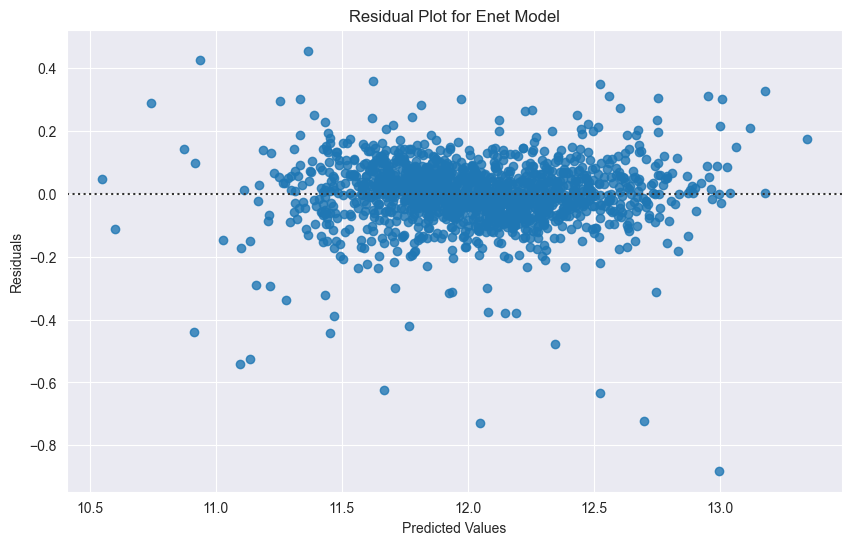

In [474]:
plot_residuals(y_train, ENet_train_pre, model_name='Enet Model')

In [481]:
GBoost.fit(train, y_train)

GBoost_train_pre = GBoost.predict(train)
GBoost_pred = np.expm1(GBoost.predict(test.values))

print("RMSE: {:.4f}".format(rmse(y_train, GBoost_train_pre)))
print("R² score: {:.4f}".format(r2(y_train, GBoost_train_pre)))

RMSE: 0.0817
R² score: 0.9582


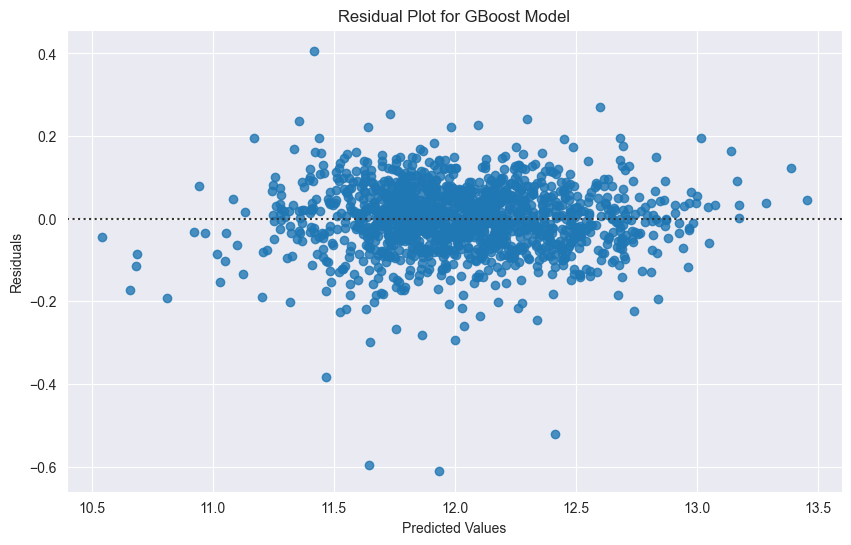

In [482]:
plot_residuals(y_train, GBoost_train_pre, model_name='GBoost Model')

In [484]:
averaged_models.fit(train, y_train)
avg_train_pred = averaged_models.predict(train)
avg_pred = np.expm1(averaged_models.predict(test.values))

print("RMSE: {:.4f}".format(rmse(y_train, avg_train_pred)))
print("R² score: {:.4f}".format(r2(y_train, avg_train_pred)))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3683
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 147
[LightGBM] [Info] Start training from score 12.024057
RMSE: 0.0746
R² score: 0.9651


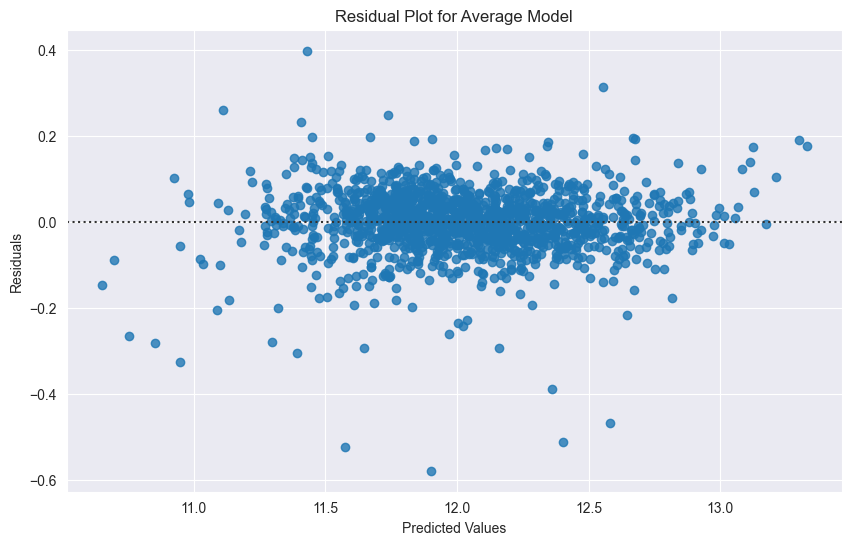

In [476]:
plot_residuals(y_train, avg_train_pred, model_name='Average Model')

In [489]:
print('Total score on train data:')

print("RMSE: {:.4f}".format(rmse(y_train,stacked_train_pred*0.45 +
               xgb_train_pred*0.10 + lgb_train_pred*0.20 + GBoost_train_pre*0.15 + avg_train_pred*0.10)))
print("R² score: {:.4f}".format(r2(y_train,stacked_train_pred*0.45 +
               xgb_train_pred*0.10 + lgb_train_pred*0.20 + GBoost_train_pre*0.15 + avg_train_pred*0.10)))

Total score on train data:
RMSE: 0.0773
R² score: 0.9626


In [492]:
ensemble = stacked_pred*0.45 + xgb_pred*0.10 + lgb_pred*0.20 + avg_pred*0.10 +GBoost_pred*0.15
ensemble = np.round(ensemble, 4)
print(ensemble)

[120486.5507 158899.0957 183027.7384 ... 164046.1577 119672.121
 223986.7414]


In [493]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [494]:
RealRrize = pd.read_csv('submission.csv')
RealRrize.head()
end_time = time.time()
print("Total execution time: {:.2f} seconds".format(end_time - start_time))

Total execution time: 42671.81 seconds
